1. Import usefull librairies

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as py
from scipy.stats import ttest_ind, f_oneway, pearsonr

In [ ]:
pd.set_option('display.max_row', 195)
pd.set_option('display.max_column', 195)

2. list of variables present in this dataset as well as their nature (are they qualitative, quantitative, discrete etc...) and their type (float, int, str etc...).

In [ ]:
print("Loading dataset...")
dataset = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv", encoding="ISO-8859-1")
print("...Done.")

dataset.head()

Loading dataset...
...Done.


iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra mn_sat tuition  race  imprace  imprelig     from zipcode  \
0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
1      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
2      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
3      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
4      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   

      income  goal  date  go_out  career  career_c  sports  tvsports  \
0  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
1  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
2  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
3  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
4  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   

   exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
0       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
1       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
2       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   

   theater  movies  concerts  music  shopping  yoga  exphappy  expnum  \
0      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
1      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
2      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
3      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
4      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   

   attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  \
0     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
1     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
2     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
3     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
4     15.0     

In [ ]:
dataset.shape    

(8378, 195)

In [ ]:
dataset.dtypes.value_counts()

float64    174
int64       13
object       8
dtype: int64

In [ ]:
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [ ]:
print(dataset.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [ ]:
#Convert income and zipcode from object to numeric
dataset['income'] = dataset['income'].str.replace(',', '').astype(float)

In [ ]:
dataset['zipcode'] = dataset['zipcode'].str.replace(',', '').astype(float)

In [ ]:
print(dataset.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [ ]:
dataset.describe()

iid           id       gender          idg       condtn  \
count  8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
mean    283.675937     8.960248     0.500597    17.327166     1.828837   
std     158.583367     5.491329     0.500029    10.940735     0.376673   
min       1.000000     1.000000     0.000000     1.000000     1.000000   
25%     154.000000     4.000000     0.000000     8.000000     2.000000   
50%     281.000000     8.000000     1.000000    16.000000     2.000000   
75%     407.000000    13.000000     1.000000    26.000000     2.000000   
max     552.000000    22.000000     1.000000    44.000000     2.000000   

              wave        round     position     positin1        order  \
count  8378.000000  8378.000000  8378.000000  6532.000000  8378.000000   
mean     11.350919    16.872046     9.042731     9.295775     8.927668   
std       5.995903     4.358458     5.514939     5.650199     5.477009   
min       1.000000     5.000000     1.000000     1.000000     1.000000   
25%       7.000000    14.000000     4.000000     4.000000     4.000000   
50%      11.000000    18.000000     8.000000     9.000000     8.000000   
75%      15.000000    20.000000    13.000000    14.000000    13.000000   
max      21.000000    22.000000    22.000000    22.000000    22.000000   

           partner          pid        match     int_corr     samerace  \
count  8378.000000  8368.000000  8378.000000  8220.000000  8378.000000   
mean      8.963595   283.863767     0.164717     0.196010     0.395799   
std       5.491068   158.584899     0.370947     0.303539     0.489051   
min       1.000000     1.000000     0.000000    -0.830000     0.000000   
25%       4.000000   154.000000     0.000000    -0.020000     0.000000   
50%       8.000000   281.000000     0.000000     0.210000     0.000000   
75%      13.000000   408.000000     0.000000     0.430000     1.000000   
max      22.000000   552.000000     1.000000     0.910000     1.000000   

             age_o       race_o     pf_o_att     pf_o_sin     pf_o_int  \
count  8274.000000  8305.000000  8289.000000  8289.000000  8289.000000   
mean     26.364999     2.756653    22.495347    17.396867    20.270759   
std       3.563648     1.230689    12.569802     7.044003     6.782895   
min      18.000000     1.000000     0.000000     0.000000     0.000000   
25%      24.000000     2.000000    15.000000    15.000000    17.390000   
50%      26.000000     2.000000    20.000000    18.370000    20.000000   
75%      28.000000     4.000000    25.000000    20.000000    23.810000   
max      55.000000     6.000000   100.000000    60.000000    50.000000   

          pf_o_fun     pf_o_amb     pf_o_sha        dec_o       attr_o  \
count  8280.000000  8271.000000  8249.000000  8378.000000  8166.000000   
mean     17.459714    10.685375    11.845930     0.419551     6.190411   
std       6.085526     6.126544     6.362746     0.493515     1.950305   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      15.000000     5.000000     9.520000     0.000000     5.000000   
50%      18.000000    10.000000    10.640000     0.000000     6.000000   
75%      20.000000    15.000000    16.000000     1.000000     8.000000   
max      50.000000    53.000000    30.000000     1.000000    10.500000   

            sinc_o      intel_o        fun_o        amb_o       shar_o  \
count  8091.000000  8072.000000  8018.000000  7656.000000  7302.000000   
mean      7.175256     7.369301     6.400599     6.778409     5.474870   
std       1.740575     1.550501     1.954078     1.794080     2.156163   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     6.000000     5.000000     6.000000     4.000000   
50%       7.000000     7.000000     7.000000     7.000000     6.000000   
75%       8.000000     8.000000     8.000000     8.000000     7.000000   
max      10.000000    10.000000    11.000000    10.000000    10.000000   

            l

ANALYSE DES VALEURS MANQUANTES

In [ ]:
print("Percentage of missing values: ")
(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending=True)

Percentage of missing values: 


iid         0.000000
dec_o       0.000000
samerace    0.000000
match       0.000000
partner     0.000000
order       0.000000
position    0.000000
dec         0.000000
wave        0.000000
condtn      0.000000
idg         0.000000
gender      0.000000
round       0.000000
id          0.000119
pid         0.001194
race        0.007520
field       0.007520
race_o      0.008713
hiking      0.009429
dining      0.009429
exercise    0.009429
goal        0.009429
sports      0.009429
go_out      0.009429
museums     0.009429
attr2_1     0.009429
tvsports    0.009429
art         0.009429
tv          0.009429
clubbing    0.009429
reading     0.009429
sinc2_1     0.009429
theater     0.009429
movies      0.009429
concerts    0.009429
music       0.009429
shopping    0.009429
yoga        0.009429
attr1_1     0.009429
sinc1_1     0.009429
gaming      0.009429
from        0.009429
imprace     0.009429
intel1_1    0.009429
intel2_1    0.009429
fun2_1      0.009429
imprelig    0.009429
field_cd    0

Beaucoup de NAN. Les variables qui ont plus de 50% de NAN ont été supprimées

In [ ]:
dataset.columns[dataset.isna().sum()/dataset.shape[0] < 0.5] 

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=136)

In [ ]:
(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending=True)

iid         0.000000
dec_o       0.000000
samerace    0.000000
match       0.000000
partner     0.000000
order       0.000000
position    0.000000
dec         0.000000
wave        0.000000
condtn      0.000000
idg         0.000000
gender      0.000000
round       0.000000
id          0.000119
pid         0.001194
race        0.007520
field       0.007520
race_o      0.008713
hiking      0.009429
dining      0.009429
exercise    0.009429
goal        0.009429
sports      0.009429
go_out      0.009429
museums     0.009429
attr2_1     0.009429
tvsports    0.009429
art         0.009429
tv          0.009429
clubbing    0.009429
reading     0.009429
sinc2_1     0.009429
theater     0.009429
movies      0.009429
concerts    0.009429
music       0.009429
shopping    0.009429
yoga        0.009429
attr1_1     0.009429
sinc1_1     0.009429
gaming      0.009429
from        0.009429
imprace     0.009429
intel1_1    0.009429
intel2_1    0.009429
fun2_1      0.009429
imprelig    0.009429
field_cd    0

In [ ]:

dataset=dataset[dataset.columns[dataset.isna().sum()/dataset.shape[0] <0.5]]
dataset.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra  race  imprace  imprelig     from  zipcode   income  goal  date  \
0      NaN   4.0      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0   
1      NaN   4.0      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0   
2      NaN   4.0      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0   
3      NaN   4.0      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0   
4      NaN   4.0      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0   

   go_out  career  career_c  sports  tvsports  exercise  dining  museums  art  \
0     1.0  lawyer       NaN     9.0       2.0       8.0     9.0      1.0  1.0   
1     1.0  lawyer       NaN     9.0       2.0       8.0     9.0      1.0  1.0   
2     1.0  lawyer       NaN     9.0       2.0       8.0     9.0      1.0  1.0   
3     1.0  lawyer       NaN     9.0       2.0       8.0     9.0      1.0  1.0   
4     1.0  lawyer       NaN     9.0       2.0       8.0     9.0      1.0  1.0   

   hiking  gaming  clubbing  reading   tv  theater  movies  concerts  music  \
0     5.0     1.0       5.0      6.0  9.0      1.0    10.0      10.0    9.0   
1     5.0     1.0       5.0      6.0  9.0      1.0    10.0      10.0    9.0   
2     5.0     1.0       5.0      6.0  9.0      1.0    10.0      10.0    9.0   
3     5.0     1.0       5.0      6.0  9.0      1.0    10.0      10.0    9.0   
4     5.0     1.0       5.0      6.0  9.0      1.0    10.0      10.0    9.0   

   shopping  yoga  exphappy  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  \
0       8.0   1.0       3.0     15.0     20.0      20.0    15.0    15.0   
1       8.0   1.0       3.0     15.0     20.0      20.0    15.0    15.0   
2       8.0   1.0       3.0     15.0     20.0      20.0    15.0    15.0   
3       8.0   1.0       3.0     15.0     20.0      20.0    15.0    15.0   
4       8.0   1.0       3.0     15.0     20.0      20.0    15.0    15.0   

   shar1_1  attr4_1  sinc4_1  intel4_1  fun4_1  amb4_1  shar4_1  attr2_1  \
0     15.0      NaN      NaN       NaN     NaN     NaN      NaN     35.0   
1     15.0      NaN      NaN       NaN     NaN     NaN      NaN     35.0   
2     15.0      NaN      NaN       NaN     NaN 

In [ ]:
dataset.shape

(8378, 136)

In [ ]:
dataset=dataset.drop(['id', 'idg'], axis=1)
dataset.head()

iid  gender  condtn  wave  round  position  positin1  order  partner   pid  \
0    1       0       1     1     10         7       NaN      4        1  11.0   
1    1       0       1     1     10         7       NaN      3        2  12.0   
2    1       0       1     1     10         7       NaN     10        3  13.0   
3    1       0       1     1     10         7       NaN      5        4  14.0   
4    1       0       1     1     10         7       NaN      7        5  15.0   

   match  int_corr  samerace  age_o  race_o  pf_o_att  pf_o_sin  pf_o_int  \
0      0      0.14         0   27.0     2.0      35.0      20.0      20.0   
1      0      0.54         0   22.0     2.0      60.0       0.0       0.0   
2      1      0.16         1   22.0     4.0      19.0      18.0      19.0   
3      1      0.61         0   23.0     2.0      30.0       5.0      15.0   
4      1      0.21         0   24.0     3.0      30.0      10.0      20.0   

   pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  intel_o  fun_o  amb_o  \
0      20.0       0.0       5.0      0     6.0     8.0      8.0    8.0    8.0   
1      40.0       0.0       0.0      0     7.0     8.0     10.0    7.0    7.0   
2      18.0      14.0      12.0      1    10.0    10.0     10.0   10.0   10.0   
3      40.0       5.0       5.0      1     7.0     8.0      9.0    8.0    9.0   
4      10.0      10.0      20.0      1     8.0     7.0      9.0    6.0    9.0   

   shar_o  like_o  prob_o  met_o   age field  field_cd undergra  race  \
0     6.0     7.0     4.0    2.0  21.0   Law       1.0      NaN   4.0   
1     5.0     8.0     4.0    2.0  21.0   Law       1.0      NaN   4.0   
2    10.0    10.0    10.0    1.0  21.0   Law       1.0      NaN   4.0   
3     8.0     7.0     7.0    2.0  21.0   Law       1.0      NaN   4.0   
4     7.0     8.0     6.0    2.0  21.0   Law       1.0      NaN   4.0   

   imprace  imprelig     from  zipcode   income  goal  date  go_out  career  \
0      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0     1.0  lawyer   
1      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0     1.0  lawyer   
2      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0     1.0  lawyer   
3      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0     1.0  lawyer   
4      2.0       4.0  Chicago  60521.0  69487.0   2.0   7.0     1.0  lawyer   

   career_c  sports  tvsports  exercise  dining  museums  art  hiking  gaming  \
0       NaN     9.0       2.0       8.0     9.0      1.0  1.0     5.0     1.0   
1       NaN     9.0       2.0       8.0     9.0      1.0  1.0     5.0     1.0   
2       NaN     9.0       2.0       8.0     9.0      1.0  1.0     5.0     1.0   
3       NaN     9.0       2.0       8.0     9.0      1.0  1.0     5.0     1.0   
4       NaN     9.0       2.0       8.0     9.0      1.0  1.0     5.0     1.0   

   clubbing  reading   tv  theater  movies  concerts  music  shopping  yoga  \
0       5.0      6.0  9.0      1.0    10.0      10.0    9.0       8.0   1.0   
1       5.0      6.0  9.0      1.0    10.0      10.0    9.0       8.0   1.0   
2       5.0      6.0  9.0      1.0    10.0      10.0    9.0       8.0   1.0   
3       5.0      6.0  9.0      1.0    10.0      10.0    9.0       8.0   1.0   
4       5.0      6.0  9.0      1.0    10.0      10.0    9.0       8.0   1.0   

   exphappy  attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  \
0       3.0     15.0     20.0      20.0    15.0    15.0     15.0      NaN   
1       3.0     15.0     20.0      20.0    15.0    15.0     15.0      NaN   
2       3.0     15.0     20.0      20.0    15.0    15.0     15.0      NaN   
3       3.0     15.0     20.0      20.0    15.0    15.0     15.0      NaN   
4       3.0     15.0     20.0      20.0    15.0    15.0     15.0      NaN   

   sinc4_1  intel4_1  fun4_1  amb4_1  shar4_1  attr2_1  sinc2_1  intel2_1  \
0      NaN       NaN     NaN     NaN      NaN     35.0     20.0      15.0   
1      NaN       NaN     NaN     NaN      NaN     35.0     20.0      15.0

In [ ]:
dataset.columns

Index(['iid', 'gender', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=134)

En exploitant le fichier "Speed+Dating+Data+Key", nous allons renommer certaines colonnes et décoder les modalités de certaines variables

In [ ]:
pd.options.display.max_columns = None

dataset.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     
                    
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}
goal_replacement={1:"Seemed like a fan night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4:"Looking for serious relationship",
                 5:"To say I did it",
                 6: "Other"}
frequency_replacement={1:"Several times a week",
                      2: "Twice a week",
                      3: "Once a week",
                      4: "Twice a month",
                      5: "Once a month",
                      6: "Several times a year",
                      7: "Almost never"}

In [ ]:
dataset["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
dataset["Condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
dataset["match"].replace({1:"Yes",0:"No"}, inplace=True)
dataset["samerace"].replace({1:"Yes",0:"No"},inplace=True)
dataset["race of partner"].replace(race_replacement, inplace=True)

dataset["field_cd"].replace(field_replacement, inplace=True)
dataset["race"].replace(race_replacement, inplace=True)
dataset["career_c"].replace(career_replacement, inplace=True)



dataset["goal"].replace(goal_replacement, inplace=True)
dataset["frequency of date"].replace(frequency_replacement, inplace=True)
dataset["go_out"].replace(frequency_replacement, inplace=True)

In [ ]:
dataset.columns

Index(['iid', 'Gender', 'Condition', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=134)

In [ ]:
dataset.head()

iid  Gender       Condition  wave  round  position  positin1  order  \
0    1  Female  Limited choice     1     10         7       NaN      4   
1    1  Female  Limited choice     1     10         7       NaN      3   
2    1  Female  Limited choice     1     10         7       NaN     10   
3    1  Female  Limited choice     1     10         7       NaN      5   
4    1  Female  Limited choice     1     10         7       NaN      7   

   partner   pid match  int_corr samerace  age of partner  \
0        1  11.0    No      0.14       No            27.0   
1        2  12.0    No      0.54       No            22.0   
2        3  13.0   Yes      0.16      Yes            22.0   
3        4  14.0   Yes      0.61       No            23.0   
4        5  15.0   Yes      0.21       No            24.0   

                         race of partner  partner stated preference  pf_o_sin  \
0            European/Caucasion-American                       35.0      20.0   
1            European/Caucasion-American                       60.0       0.0   
2  Asian/Pacific Islander/Asian-American                       19.0      18.0   
3            European/Caucasion-American                       30.0       5.0   
4               Latino/Hispanic American                       30.0      10.0   

   pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  intel_o  \
0      20.0      20.0       0.0       5.0      0     6.0     8.0      8.0   
1       0.0      40.0       0.0       0.0      0     7.0     8.0     10.0   
2      19.0      18.0      14.0      12.0      1    10.0    10.0     10.0   
3      15.0      40.0       5.0       5.0      1     7.0     8.0      9.0   
4      20.0      10.0      10.0      20.0      1     8.0     7.0      9.0   

   fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field field_cd undergra  \
0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law      Law      NaN   
1    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law      Law      NaN   
2   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law      Law      NaN   
3    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law      Law      NaN   
4    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law      Law      NaN   

                                    race  race importance  \
0  Asian/Pacific Islander/Asian-American              2.0   
1  Asian/Pacific Islander/Asian-American              2.0   
2  Asian/Pacific Islander/Asian-American              2.0   
3  Asian/Pacific Islander/Asian-American              2.0   
4  Asian/Pacific Islander/Asian-American              2.0   

   religion importance originally from  zipcode   income                goal  \
0                  4.0         Chicago  60521.0  69487.0  To meet new people   
1                  4.0         Chicago  60521.0  69487.0  To meet new people   
2                  4.0         Chicago  60521.0  69487.0  To meet new people   
3                  4.0         Chicago  60521.0  69487.0  To meet new people   
4                  4.0         Chicago  60521.0  69487.0  To meet new people   

  frequency of date                go_out  career career_c  sports  tvsports  \
0      Almost never  Several times a week  lawyer      NaN     9.0       2.0   
1      Almost never  Several times a week  lawyer      NaN     9.0       2.0   
2      Almost never  Several times a week  lawyer      NaN     9.0       2.0   
3      Almost never  Several times a week  lawyer      NaN     9.0       2.0   
4      Almost never  Several times a week  lawyer      NaN     9.0       2.0   

   exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
0       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
1       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
2       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4       8.0     9.0      1.0  1.0     5.0     

In [ ]:
dataset.columns

Index(['iid', 'Gender', 'Condition', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=134)

VISUALISATION DE LA VARIABLE MATCH

In [ ]:
# combien de speed daters ont trouvé une correspondance ?

dataset['match'].value_counts(normalize=True)

No     0.835283
Yes    0.164717
Name: match, dtype: float64

Il semblerait qu'environ  16% seulement des personnes se soient retrouvées à un deuxième rendez-vous après la séance de speed dating.

SIGNIFICATION DES VARIABLES

Histogrammes des variables continues

<ipython-input-25-f6eda234dd64>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-25-f6eda234dd64>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-25-f6eda234dd64>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

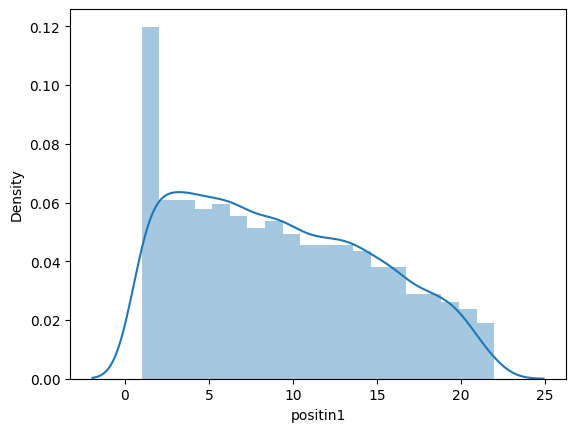

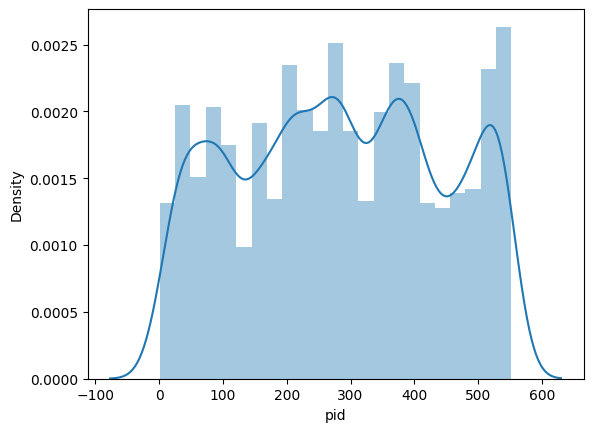

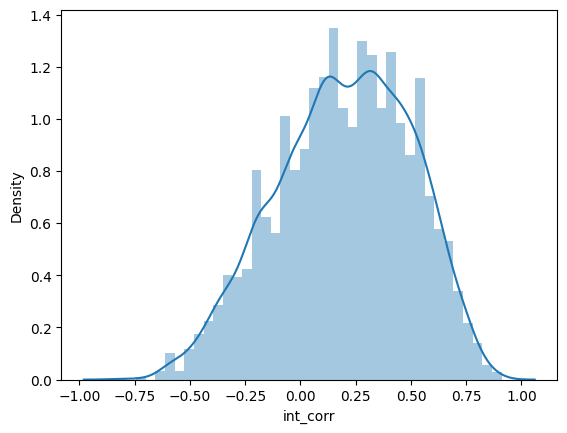

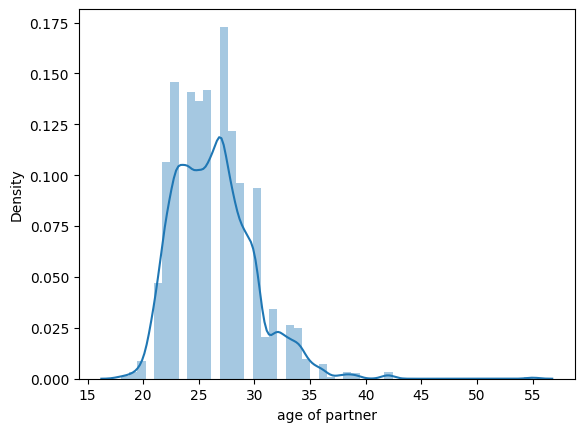

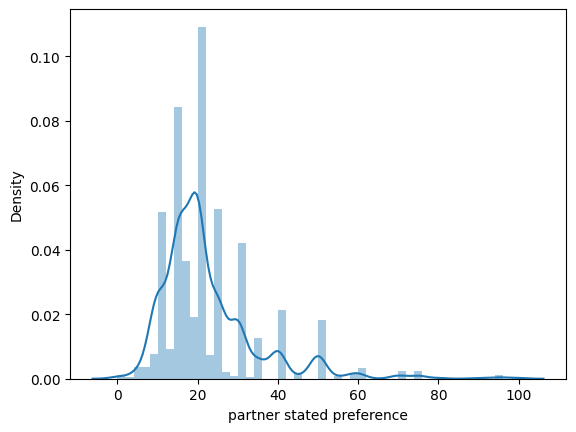

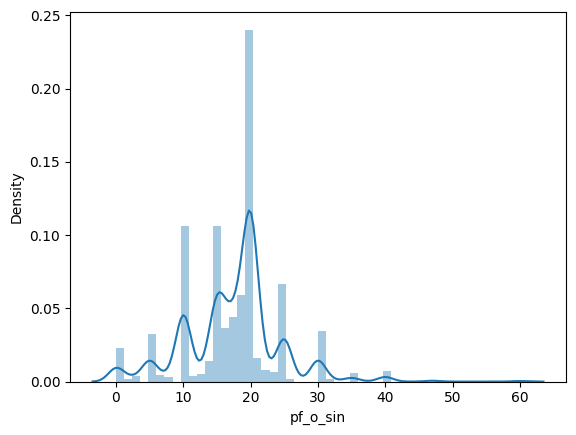

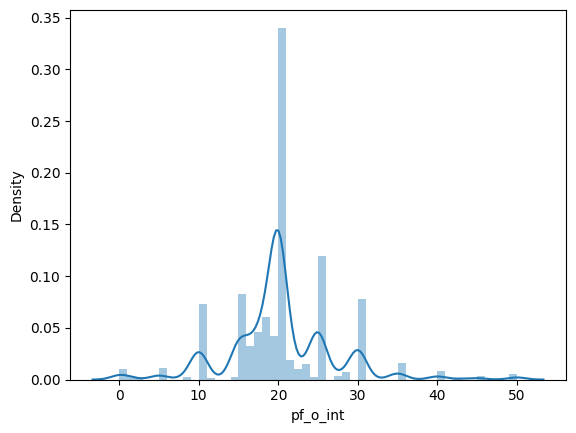

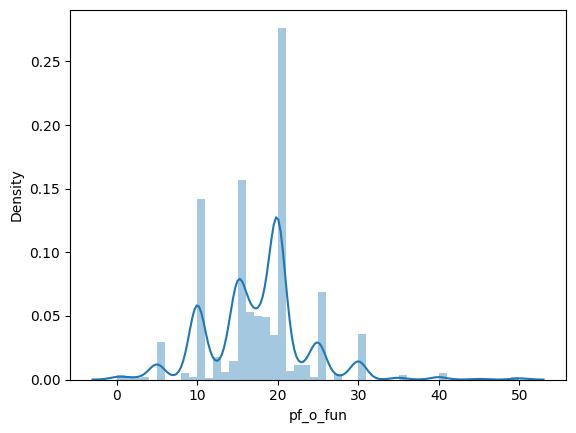

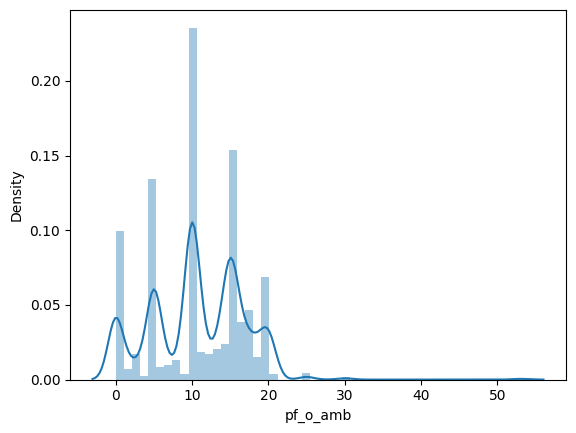

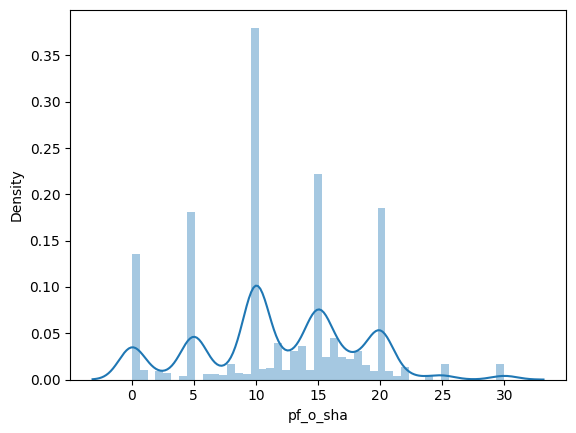

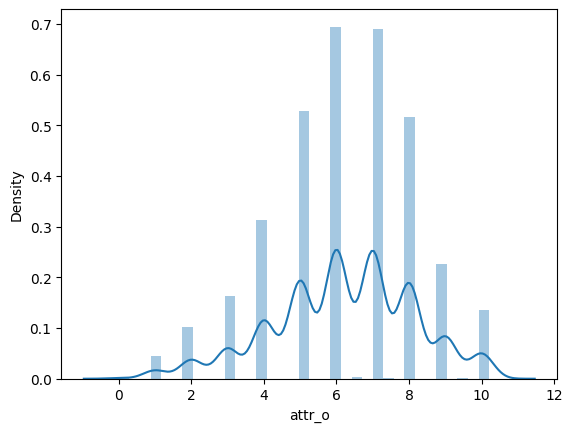

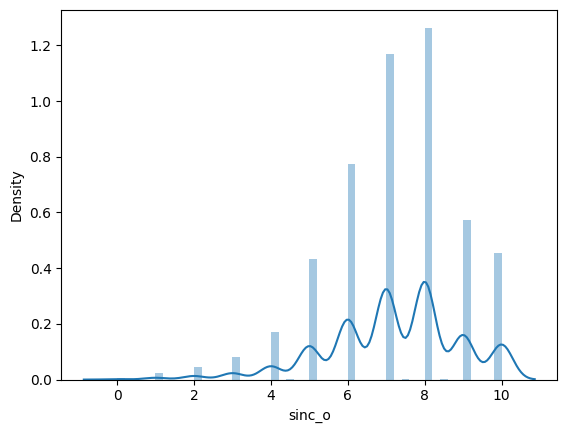

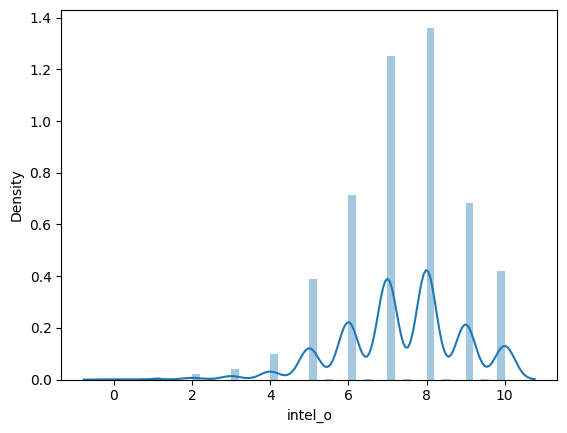

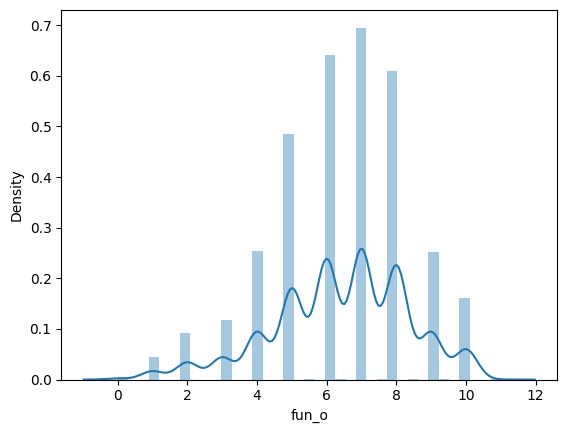

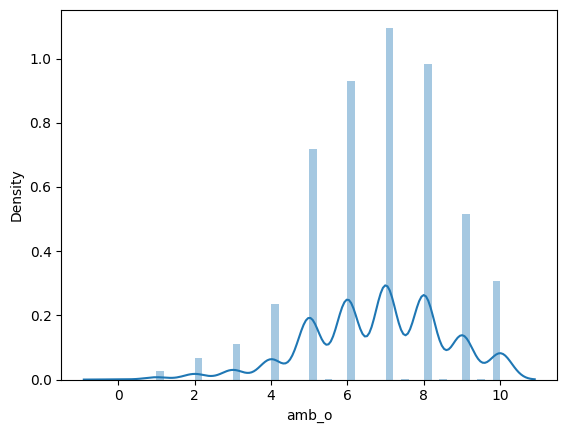

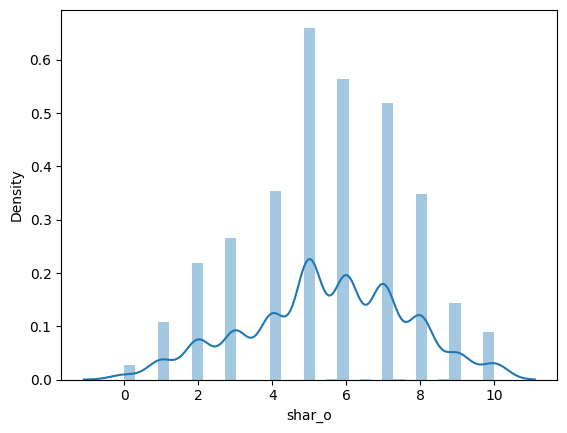

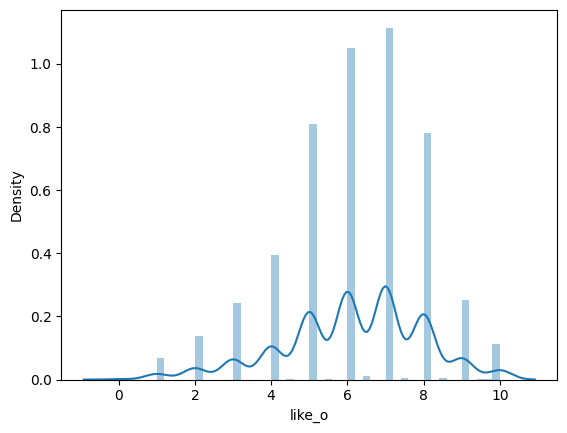

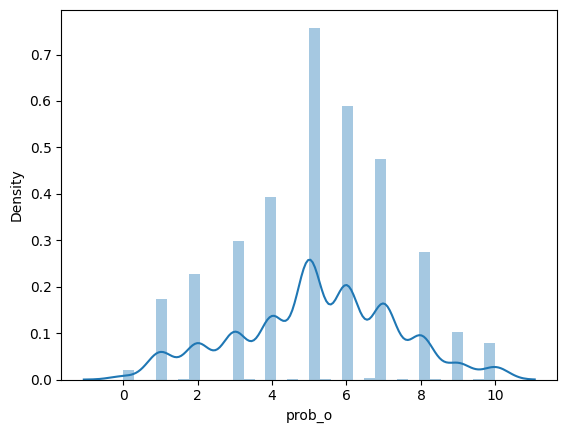

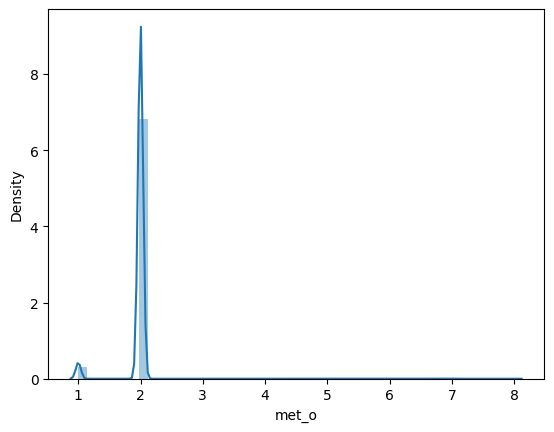

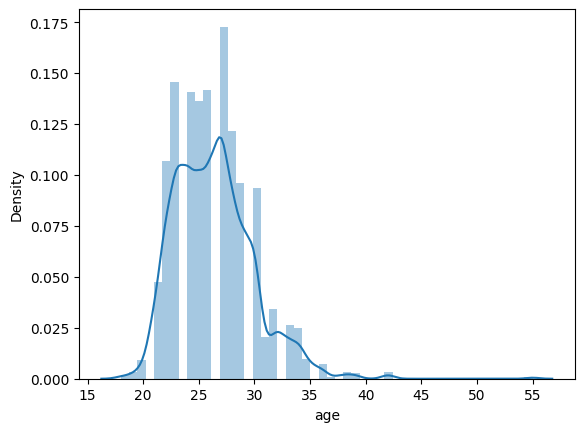

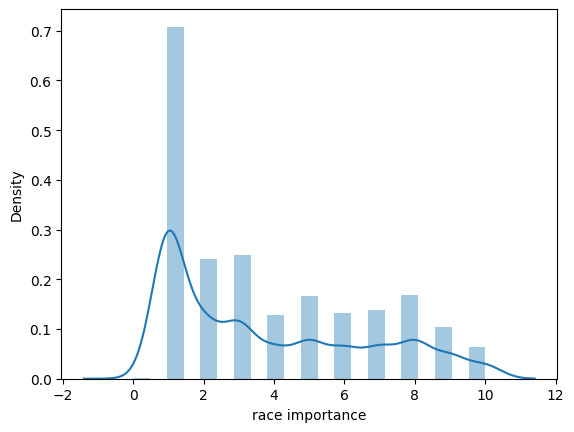

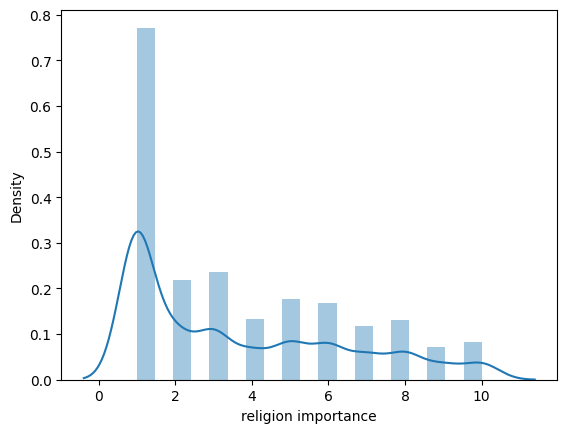

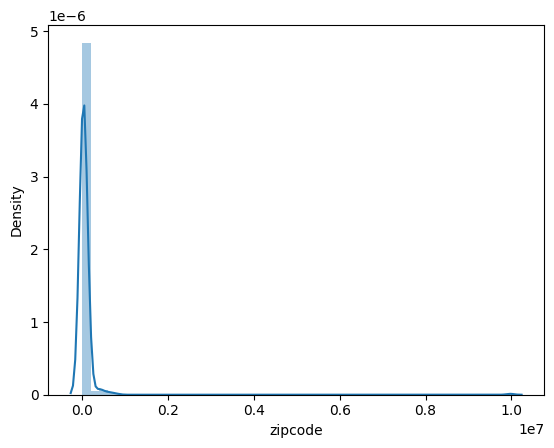

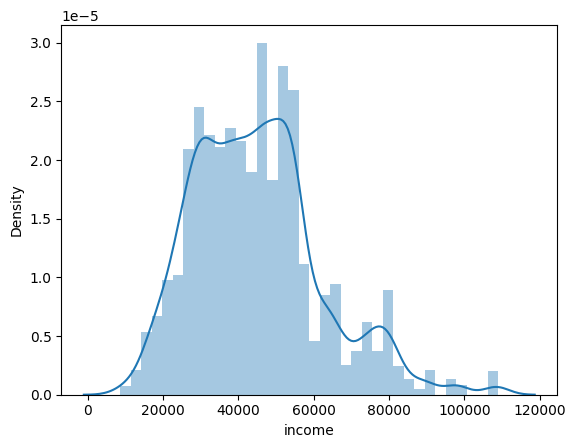

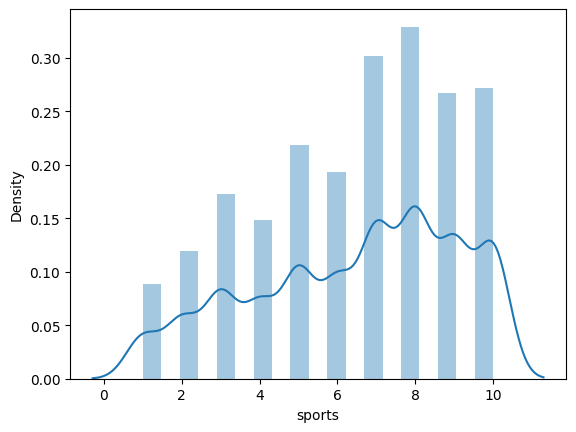

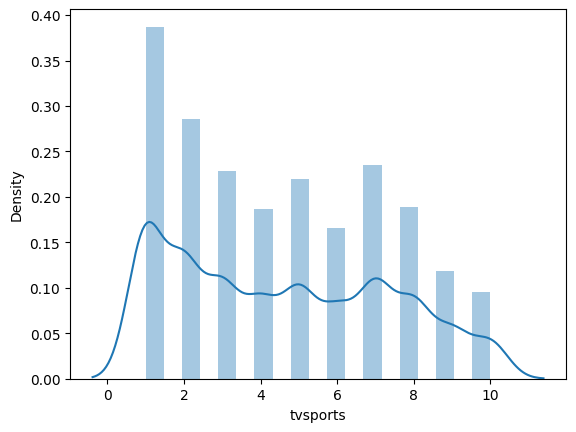

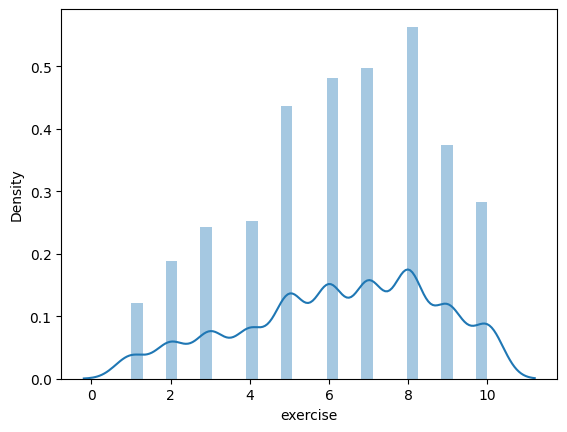

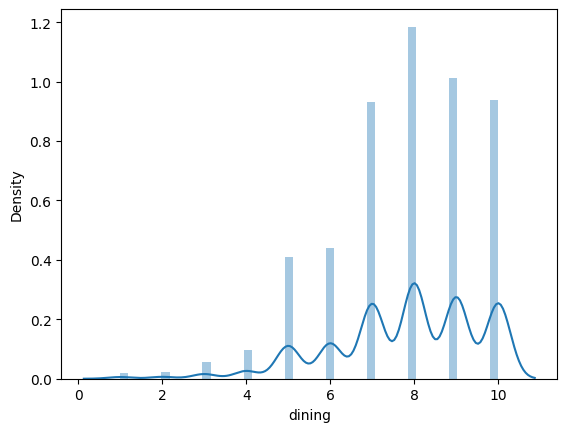

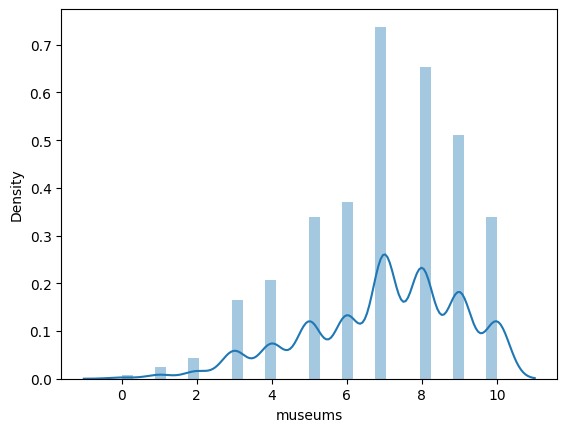

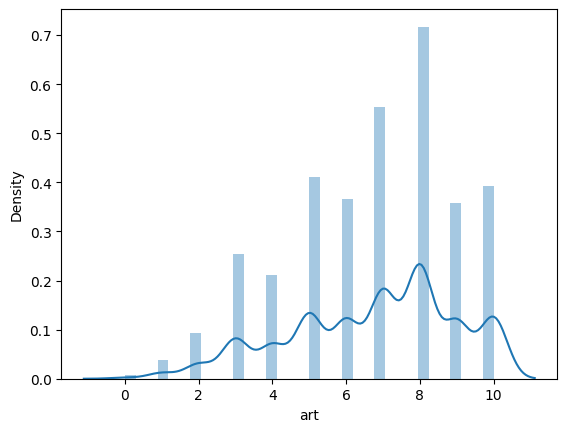

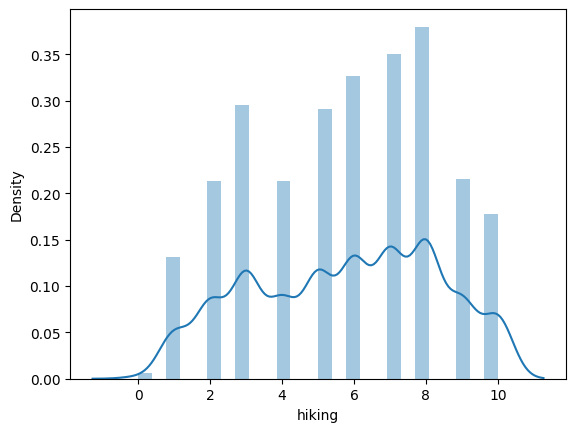

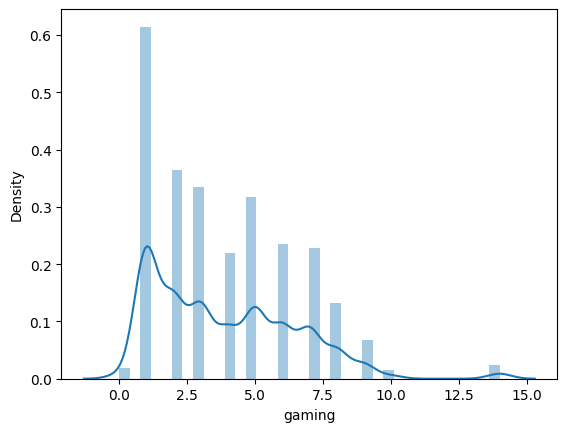

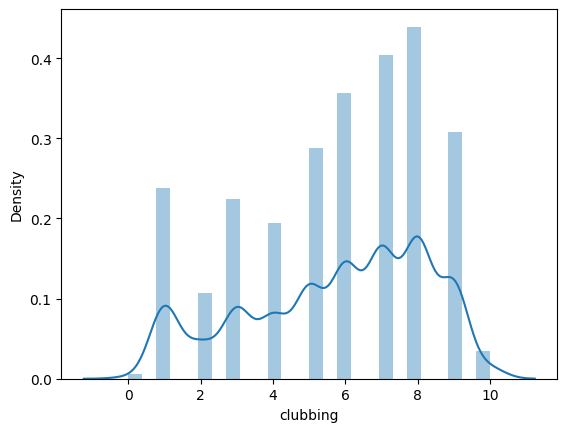

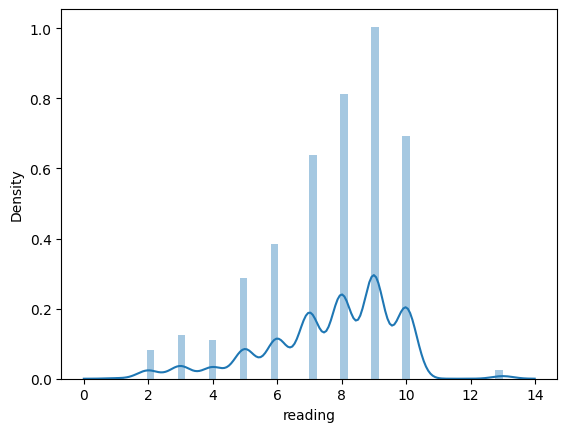

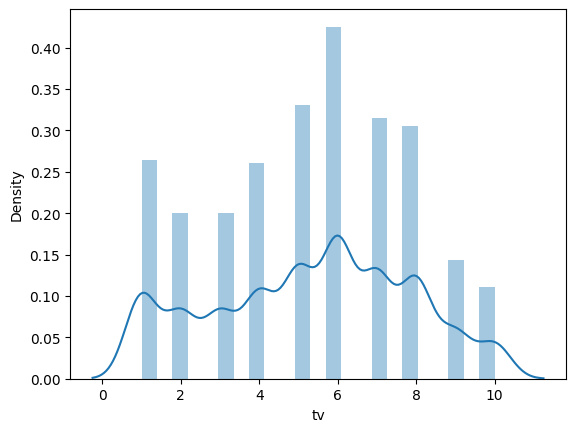

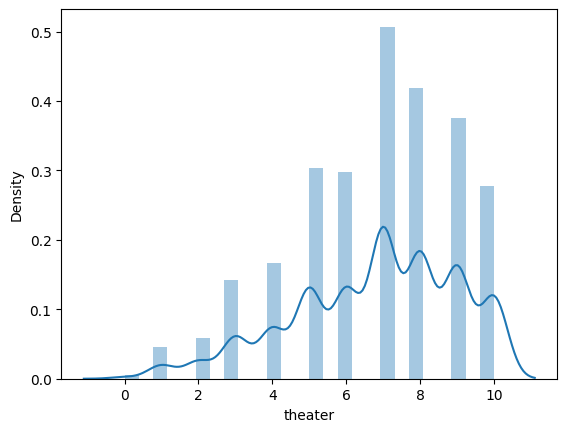

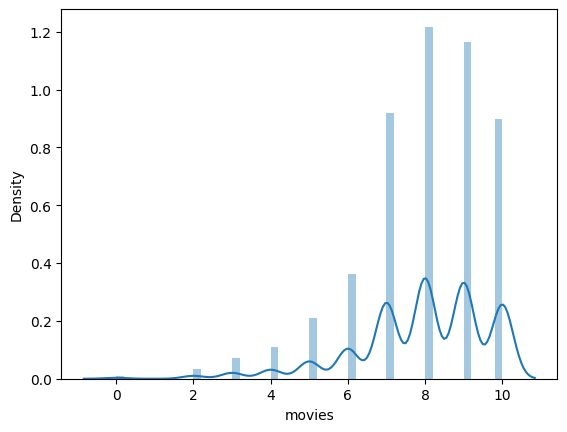

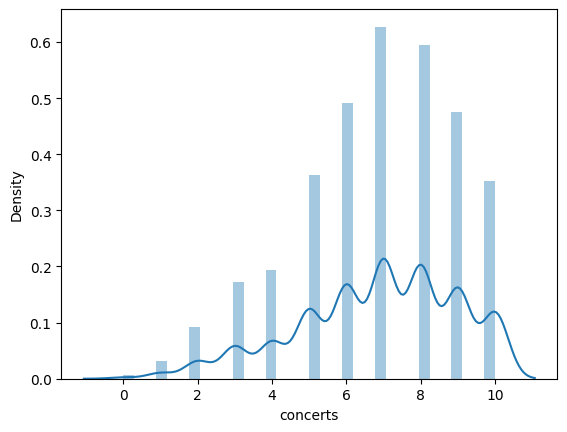

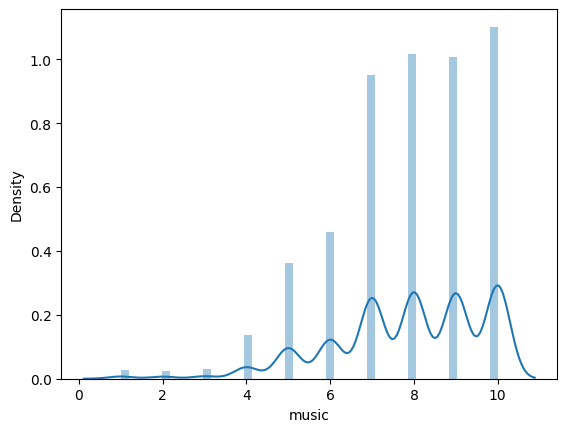

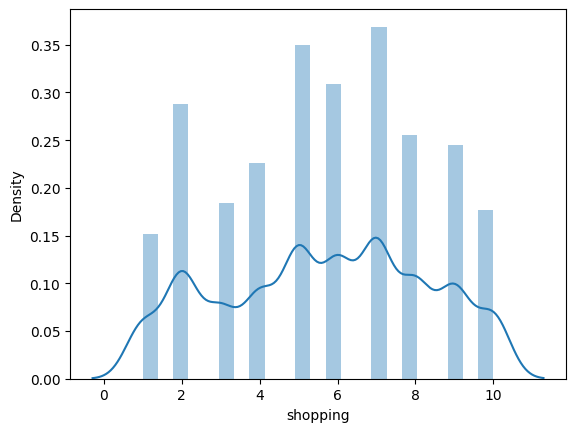

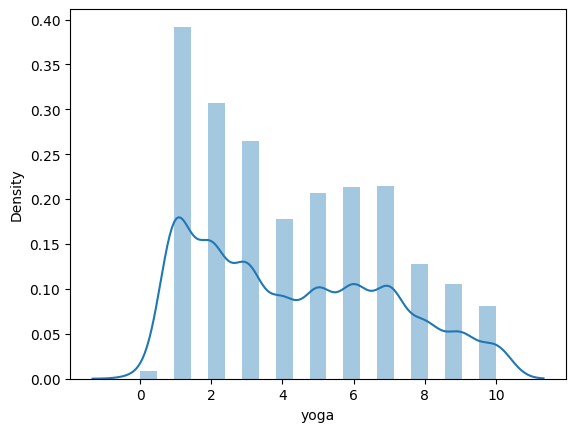

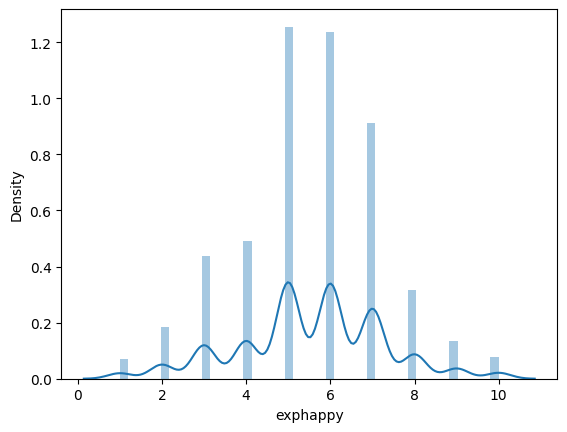

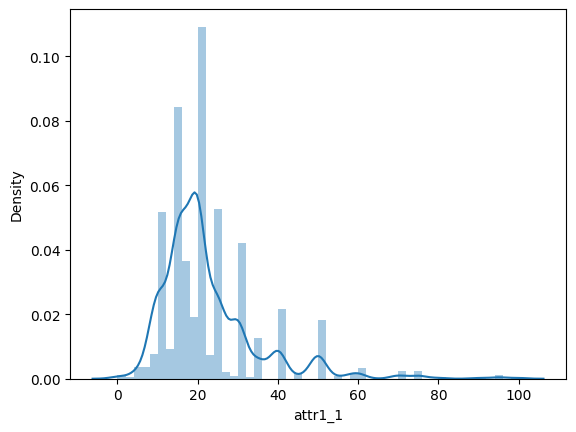

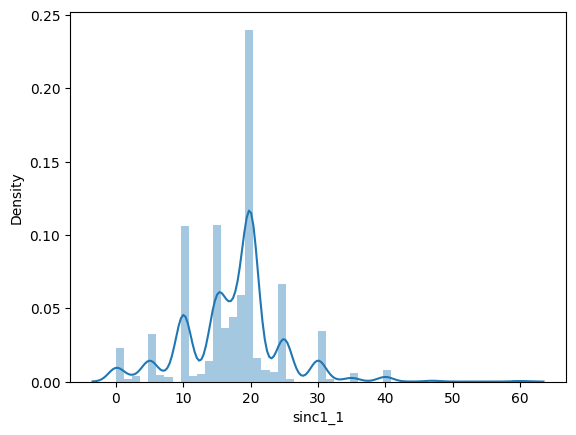

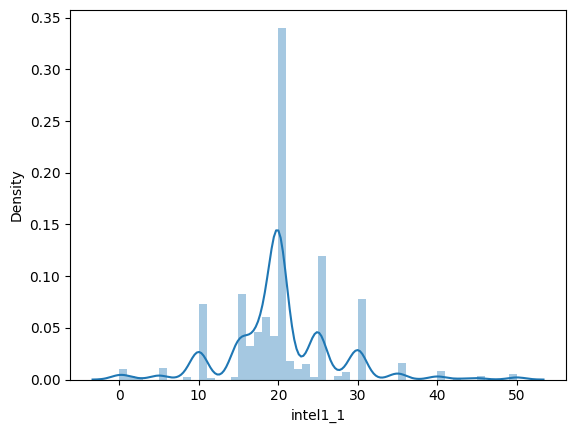

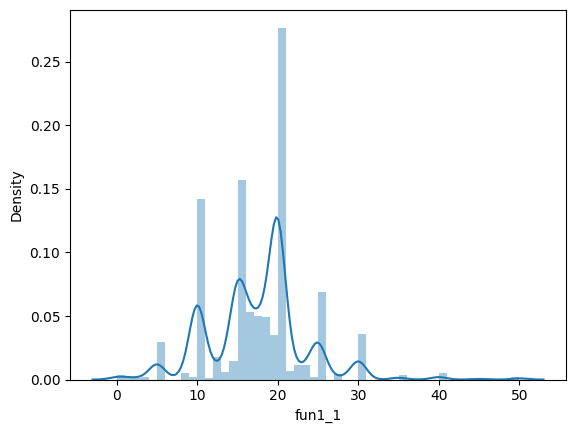

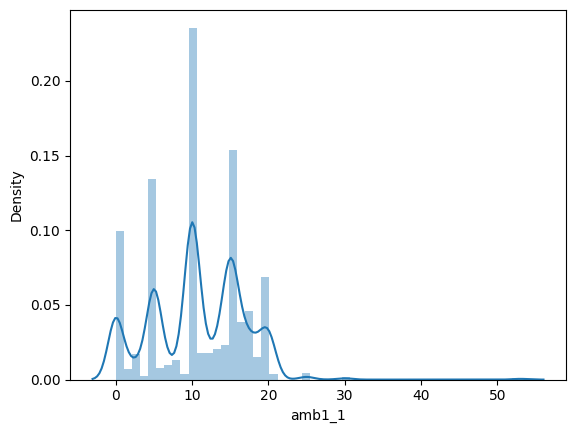

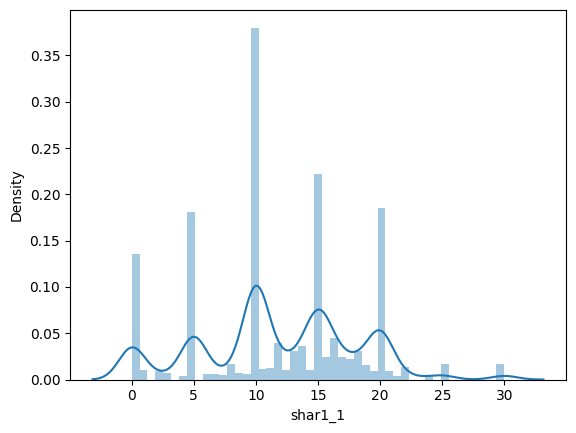

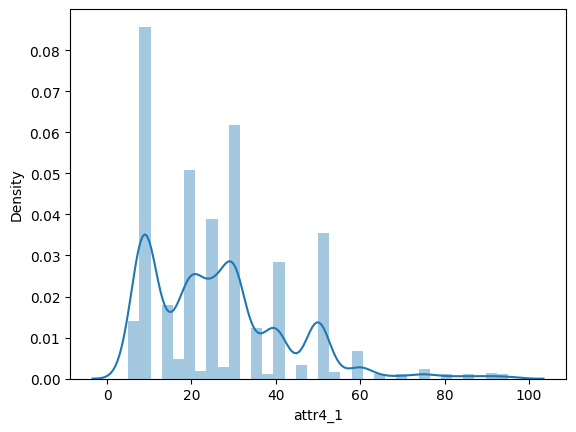

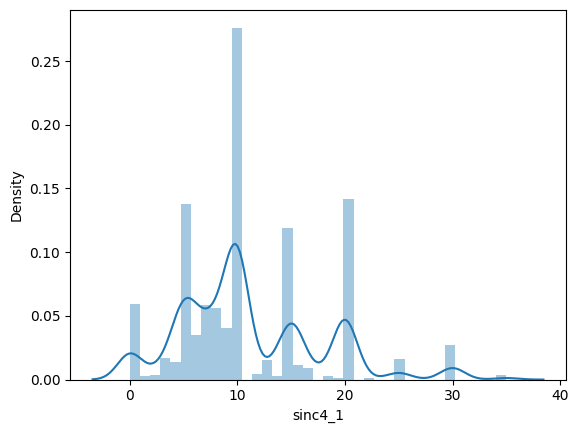

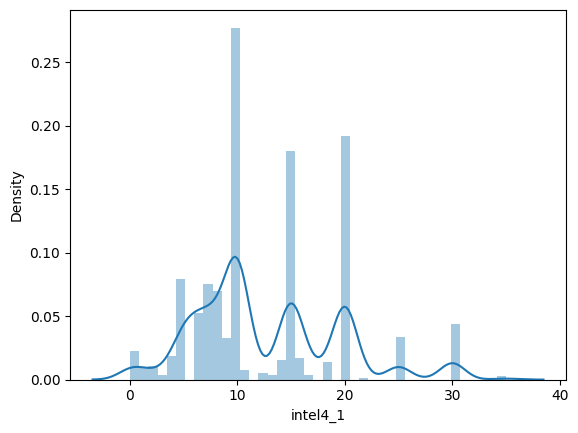

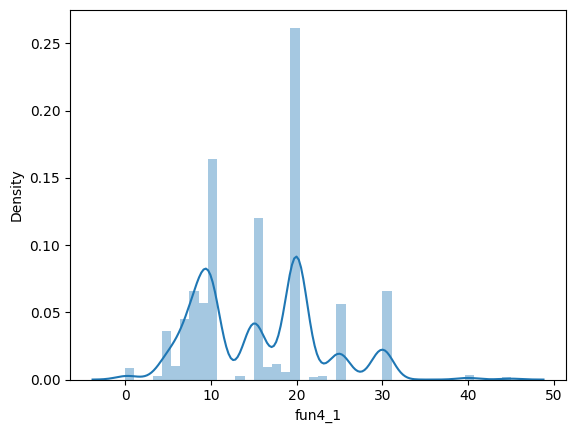

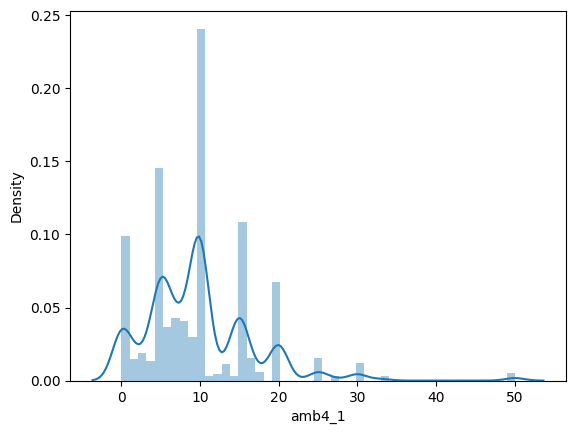

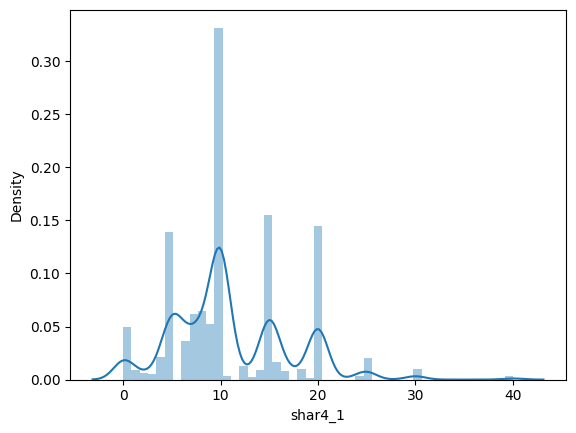

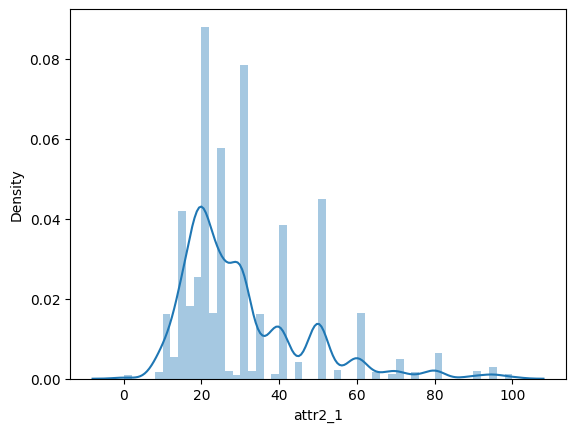

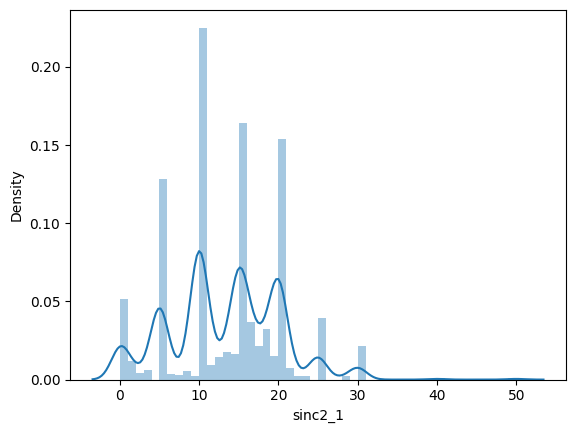

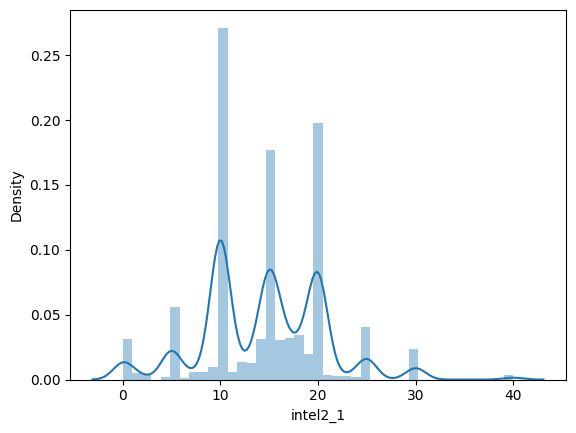

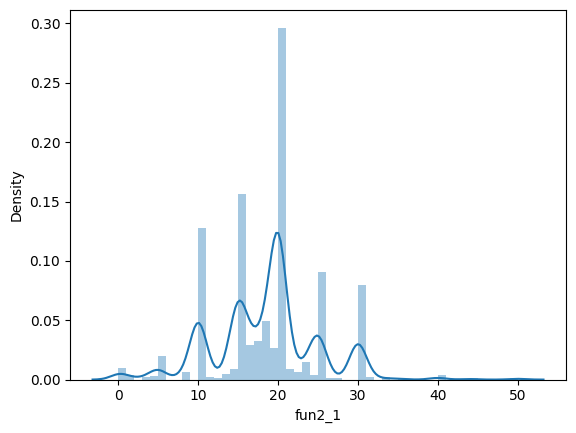

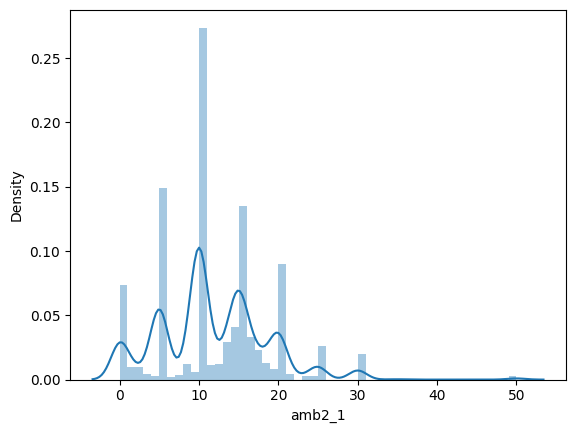

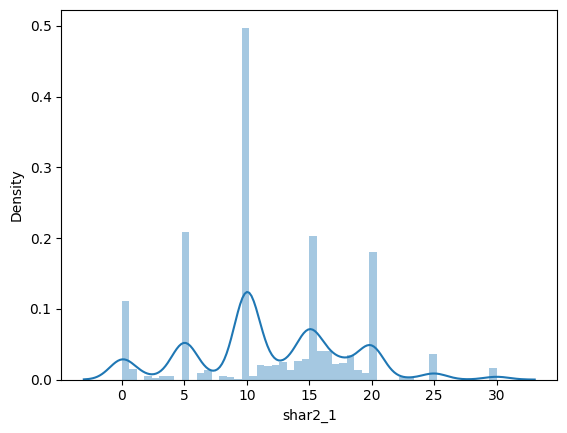

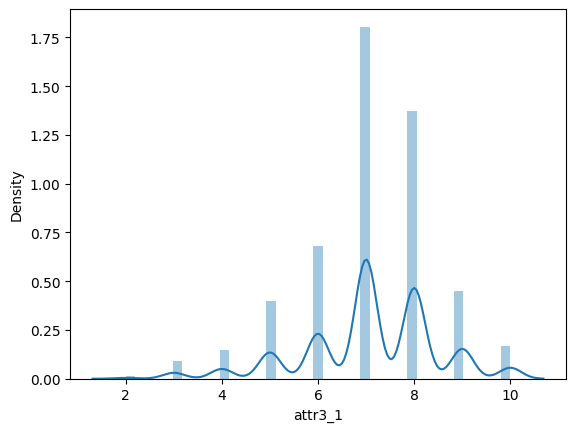

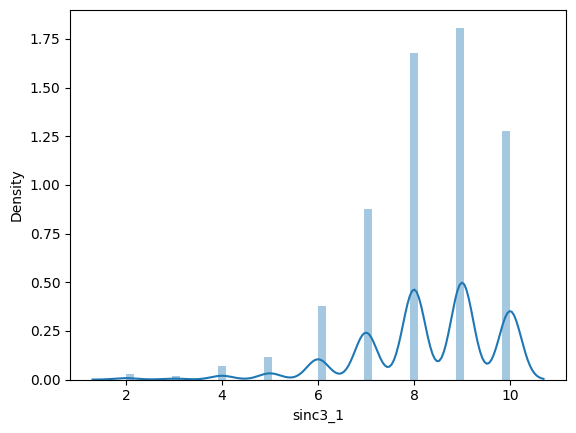

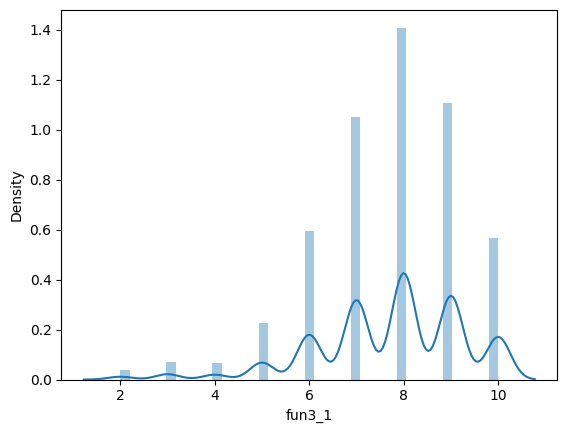

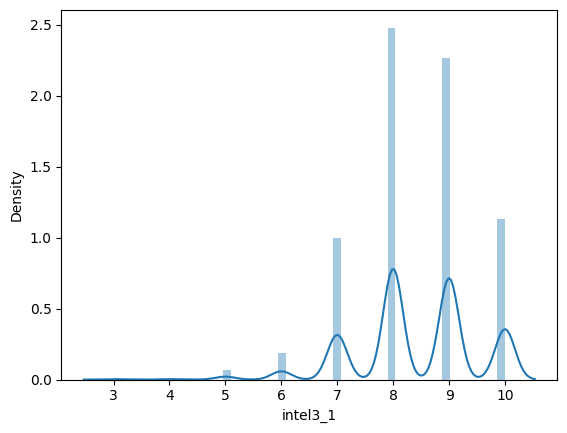

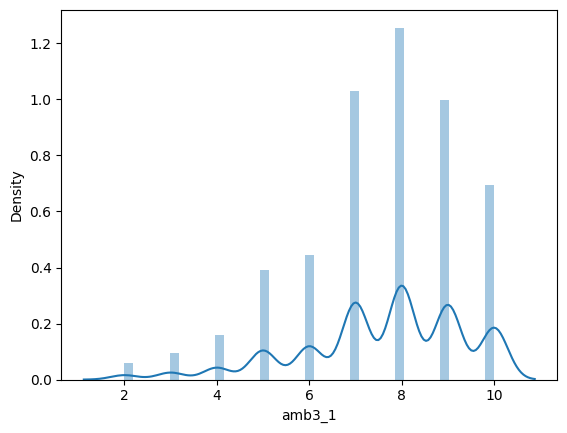

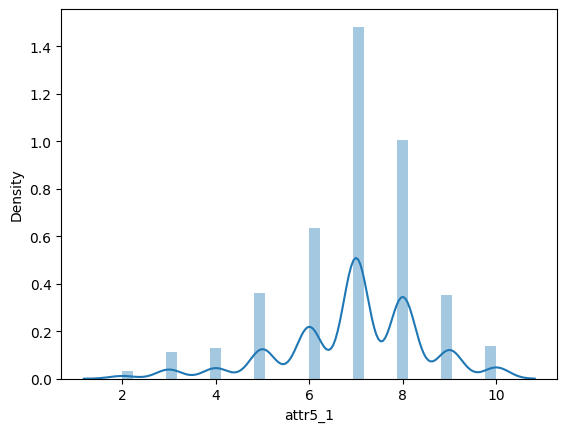

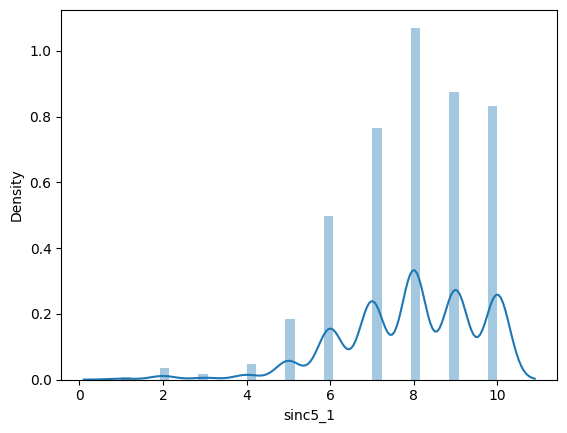

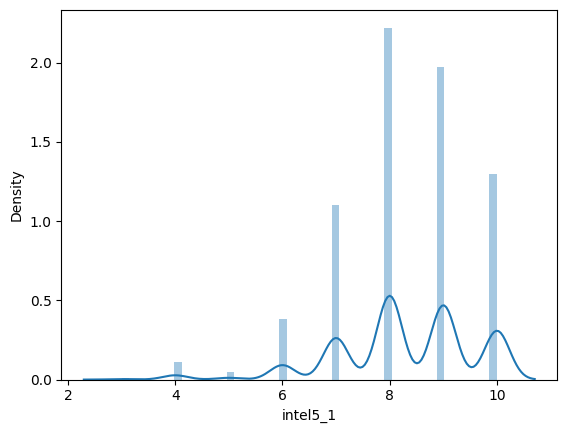

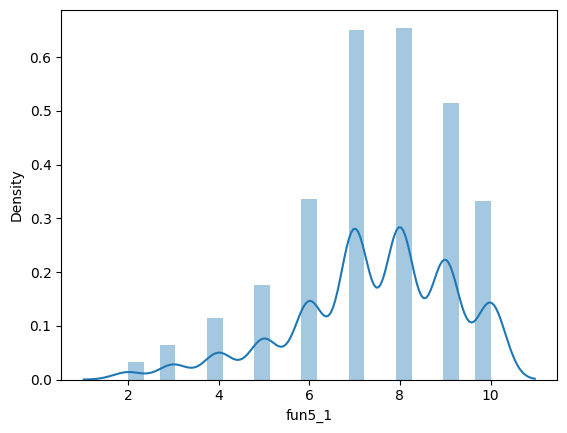

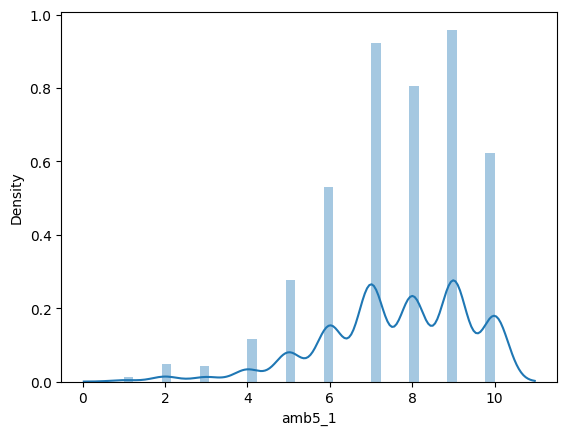

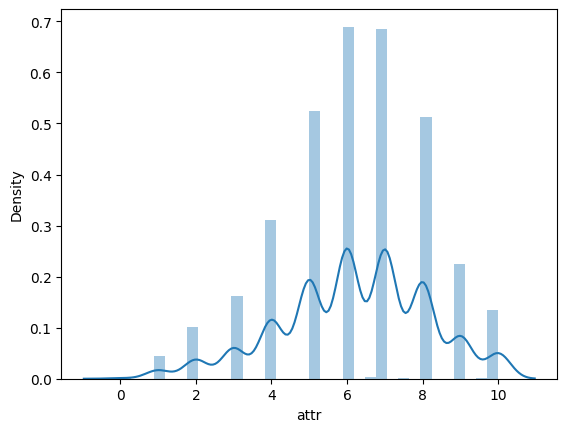

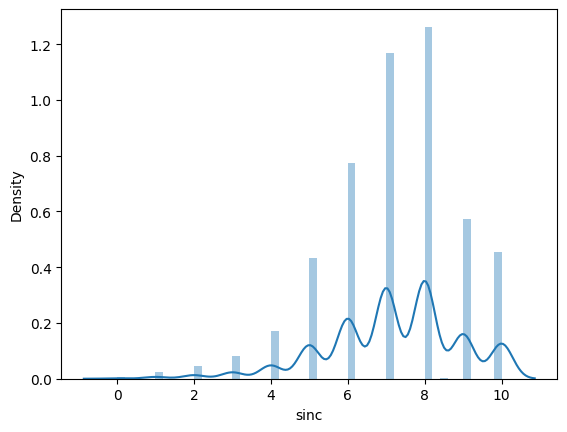

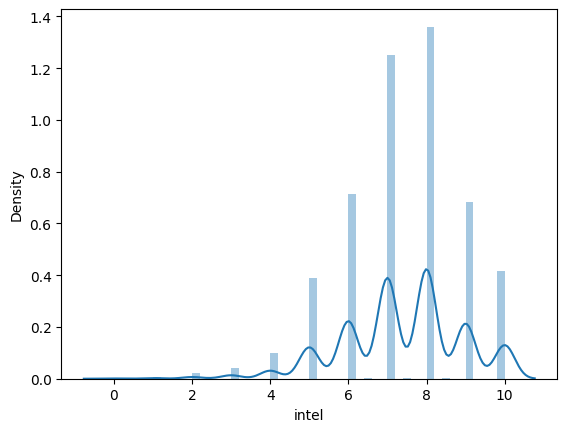

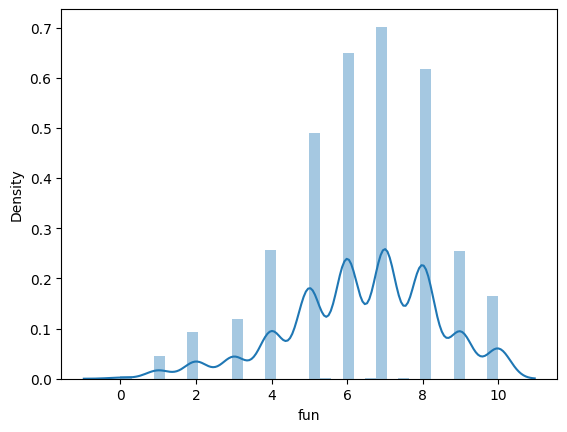

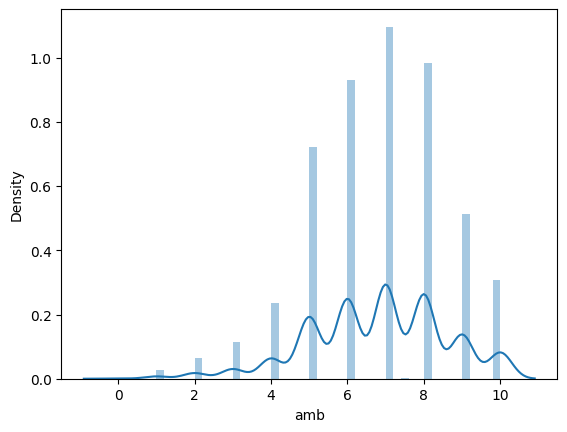

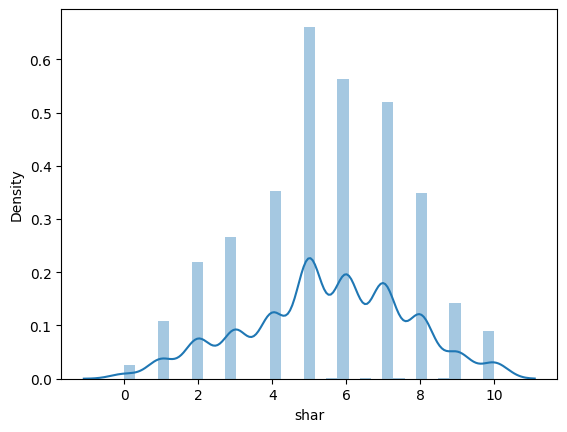

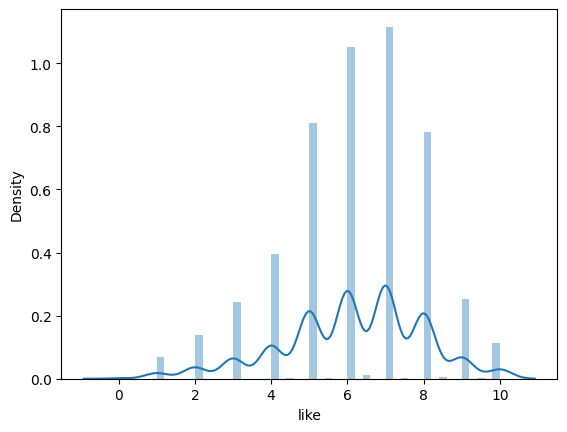

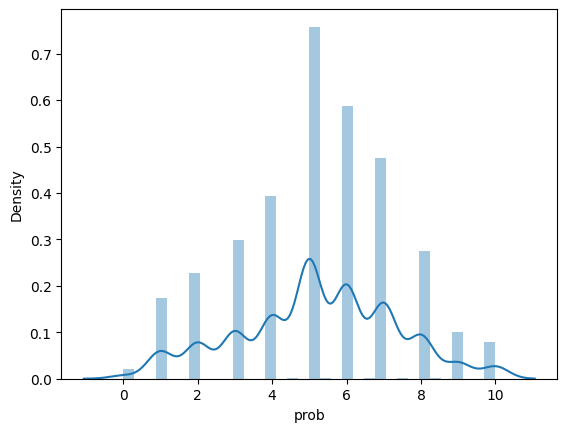

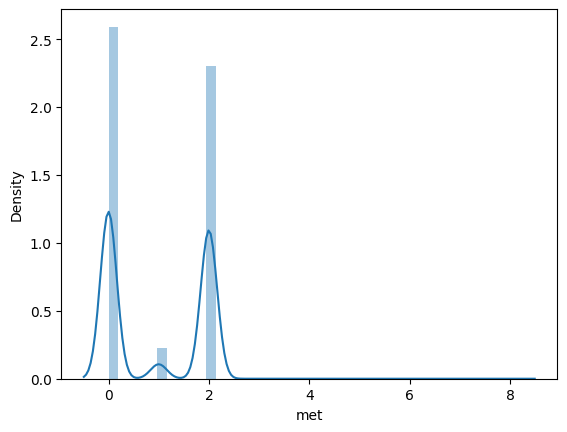

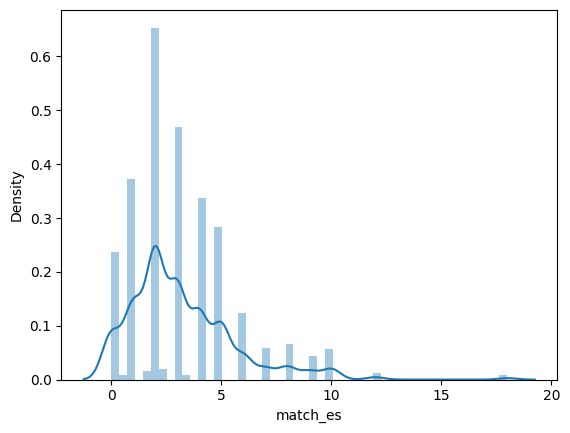

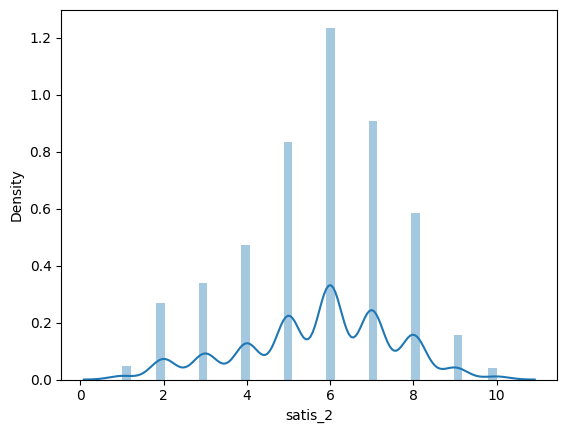

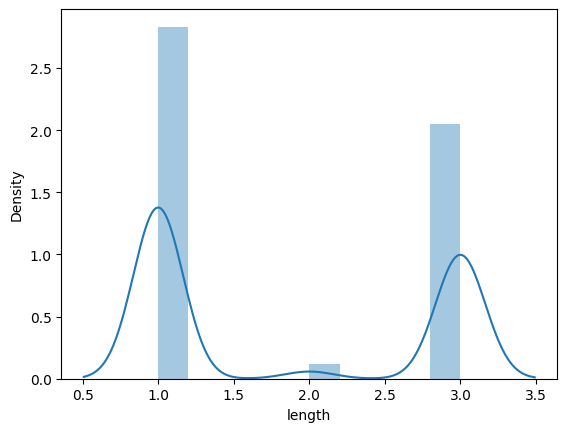

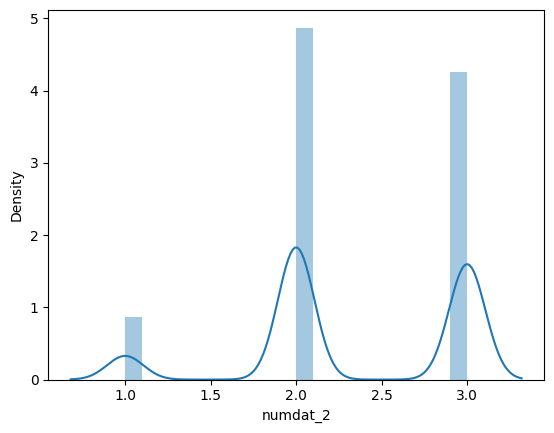

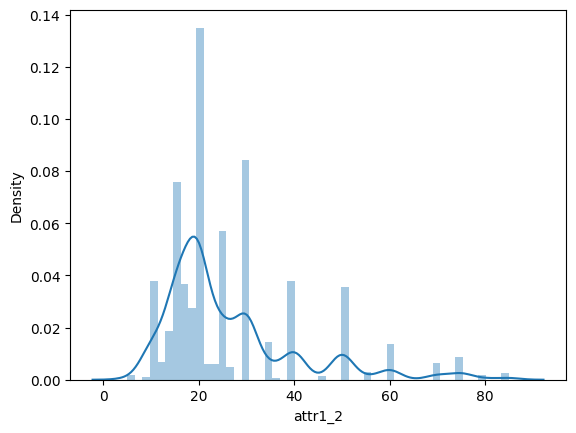

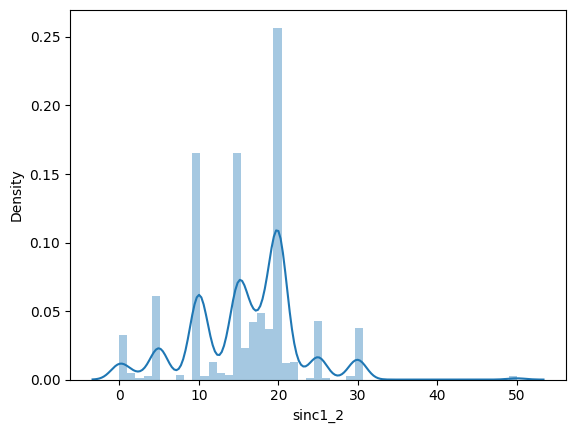

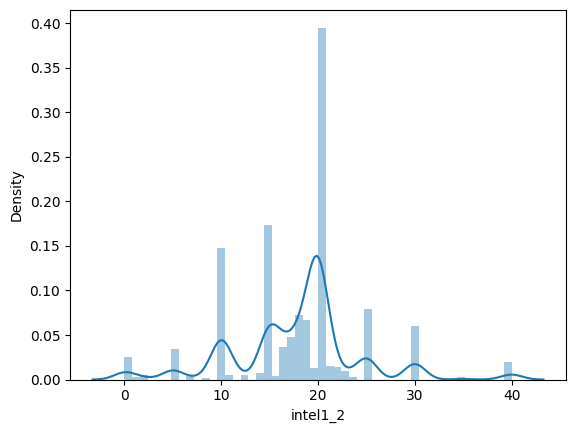

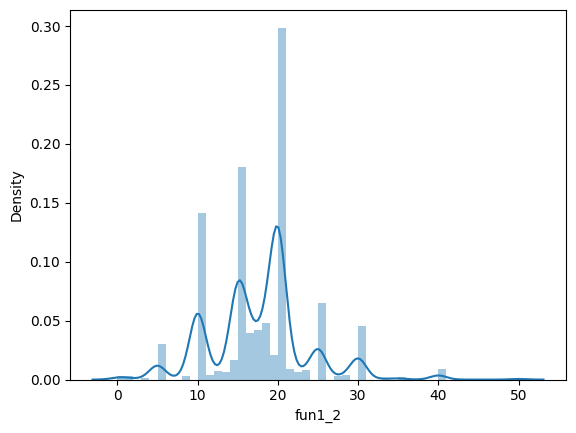

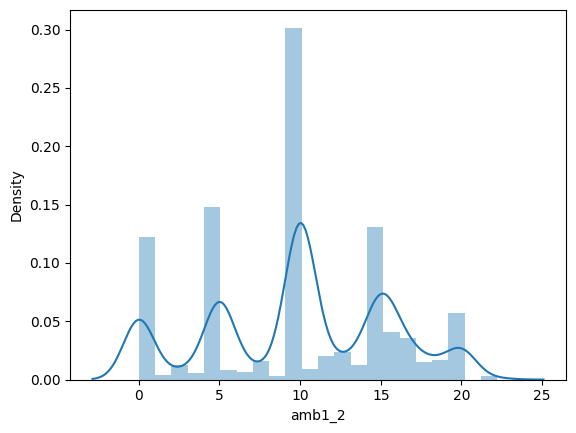

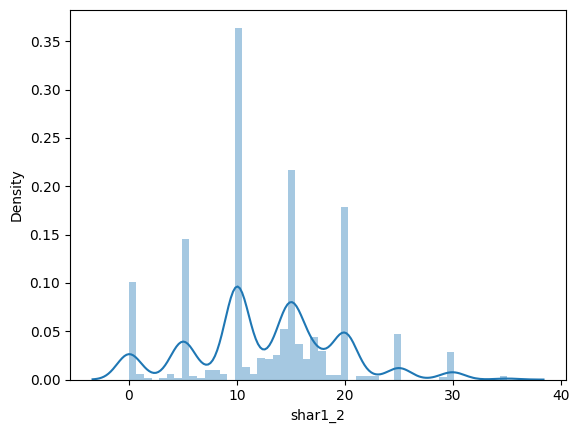

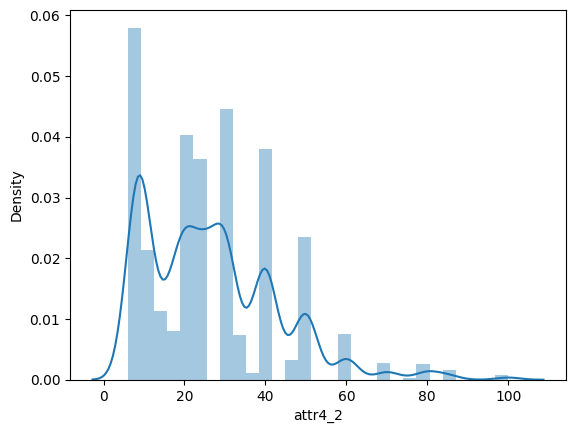

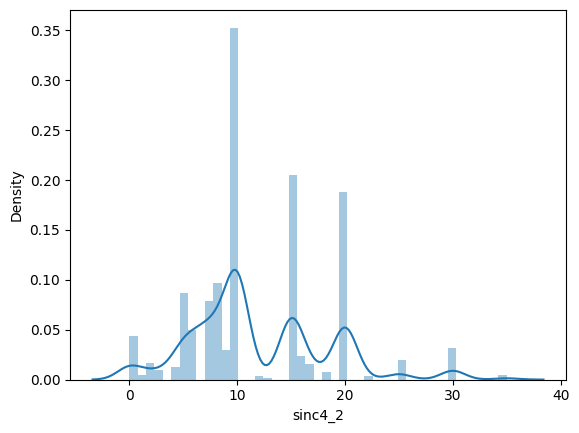

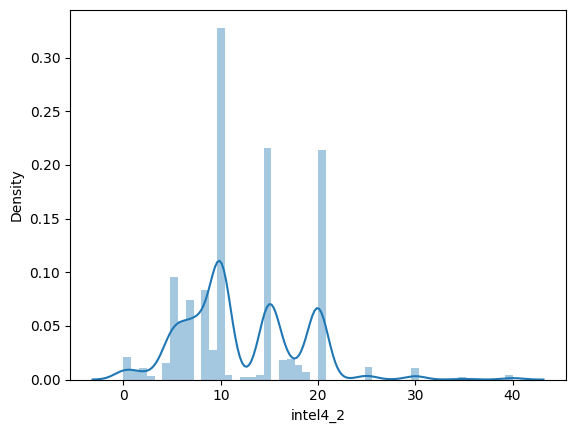

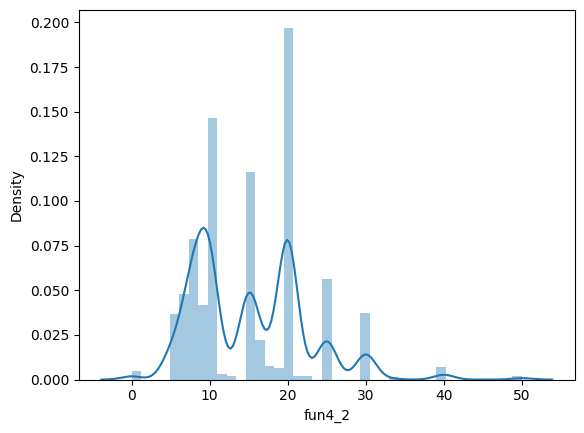

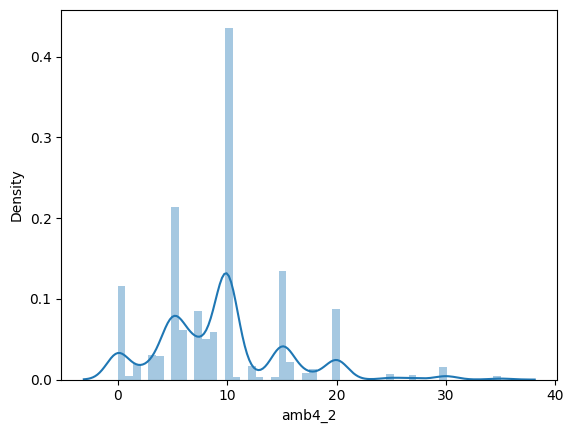

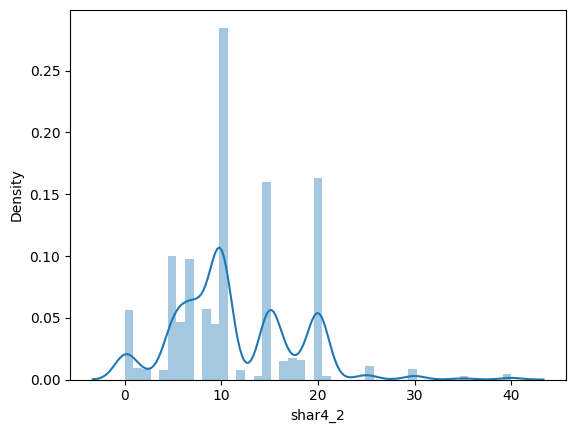

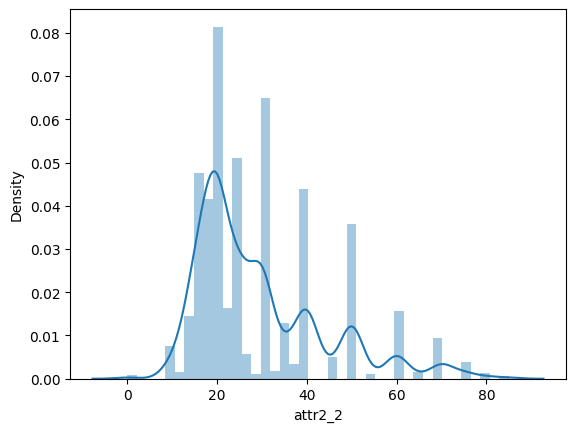

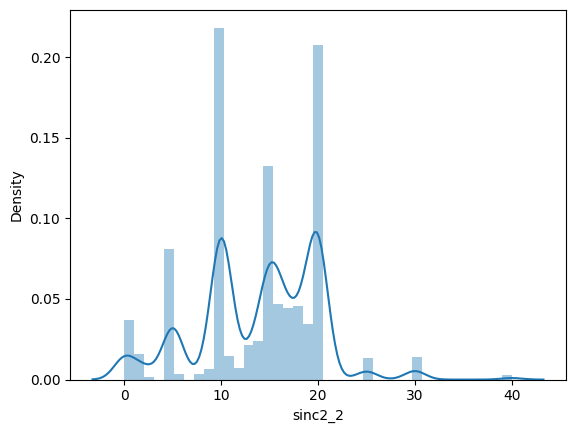

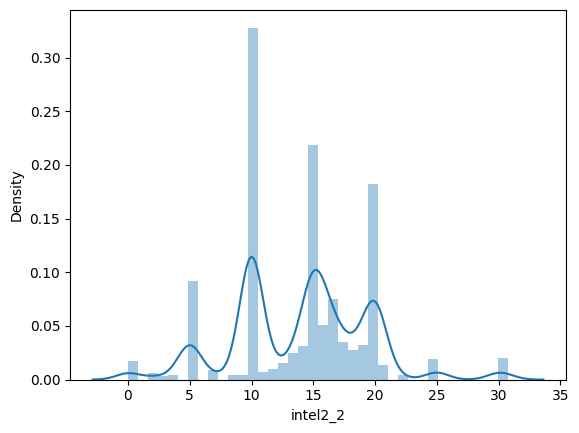

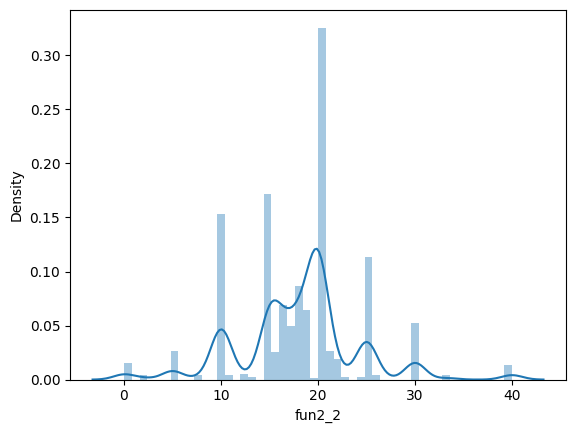

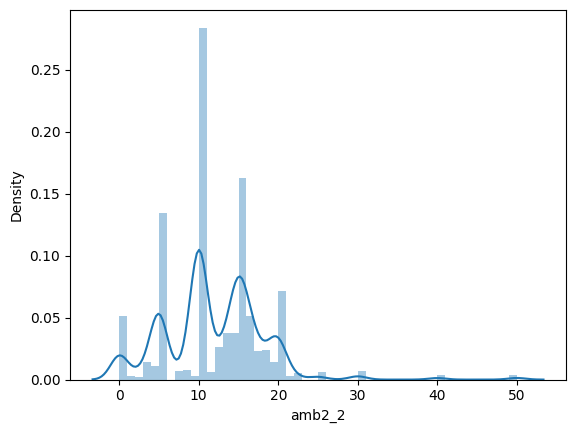

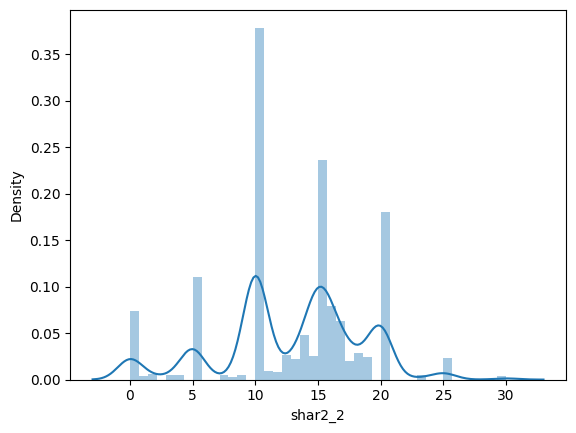

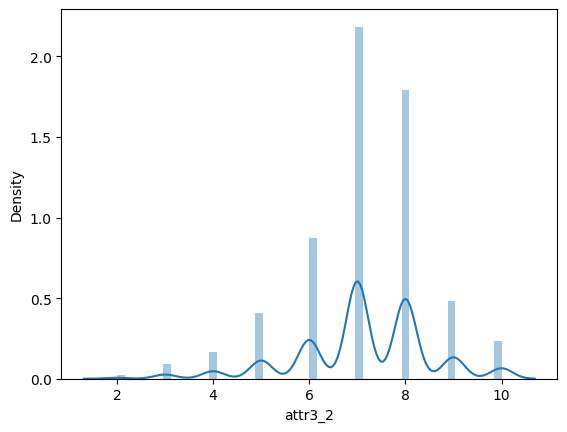

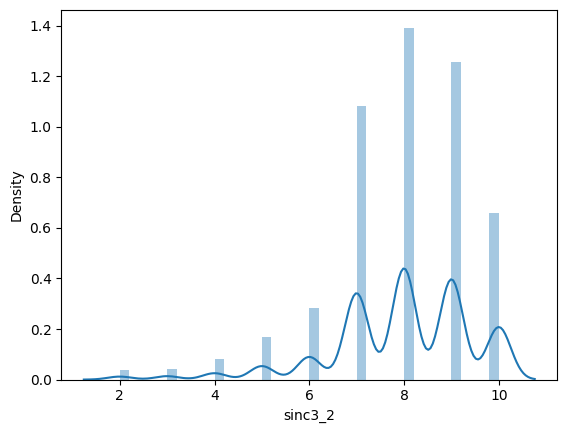

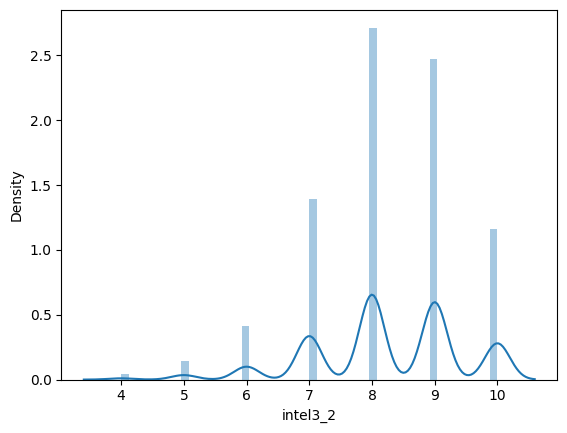

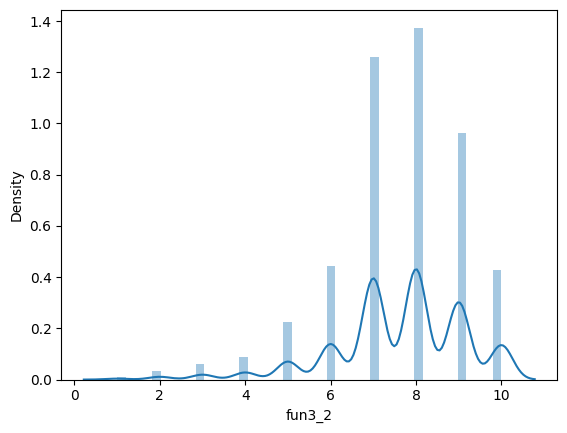

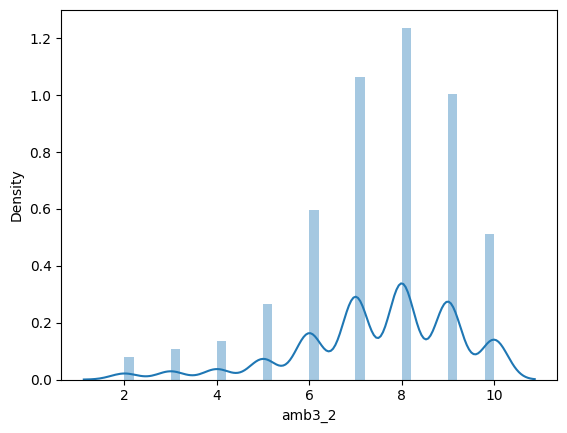

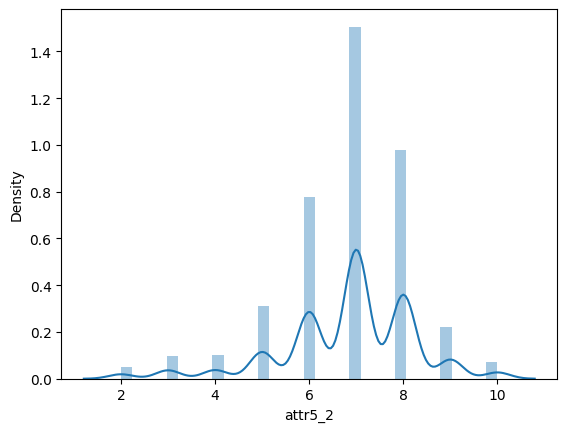

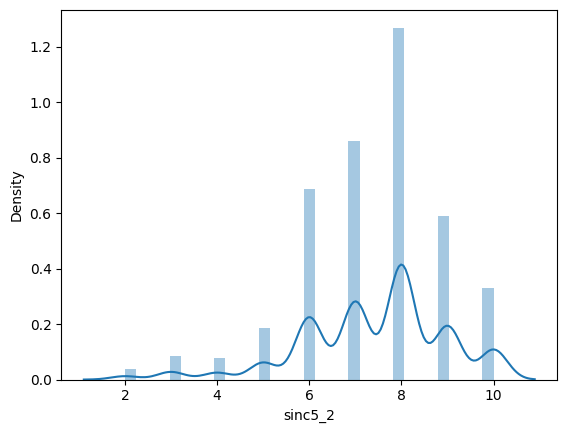

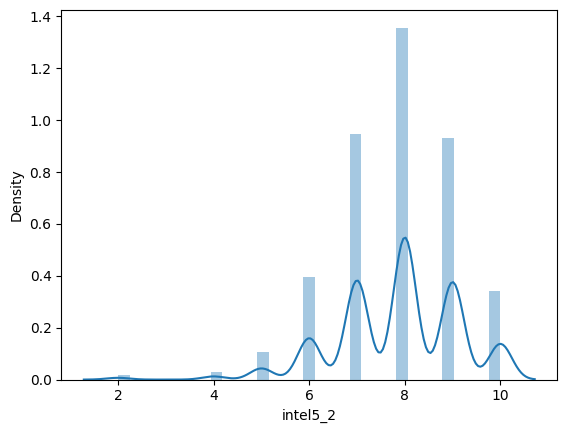

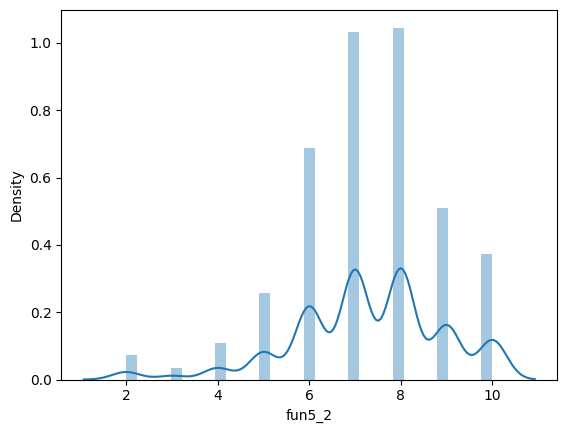

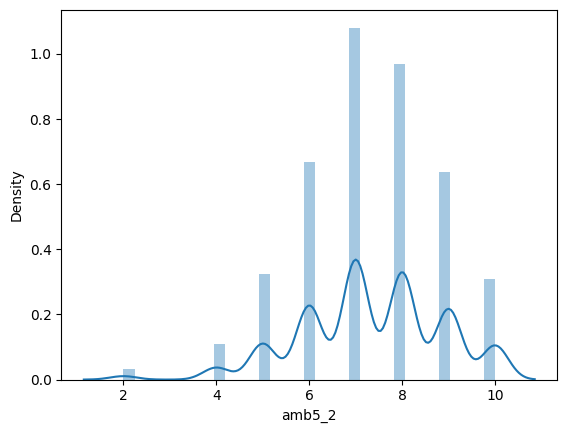

In [ ]:
for col in dataset.select_dtypes('float'):
    plt.figure()
    sns.distplot(dataset[col]);

La plupart des participants étaient entre la vingtaine et le début de la trentaine.

Certaines variables sont difficiles à interpréter

quelques variables continues sont asymétriques (skewed)

Visualisation des variables catégorielles

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 142 (\x8e) missing from current font.



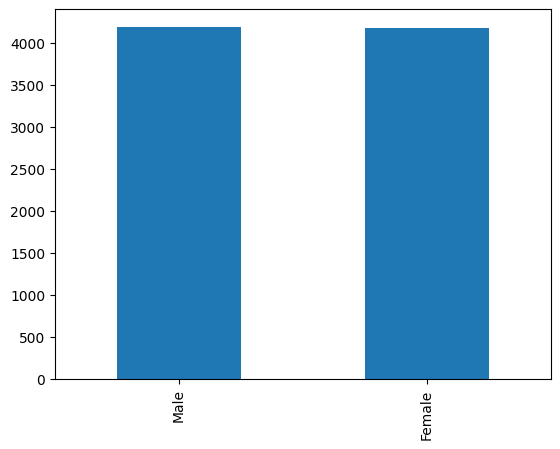

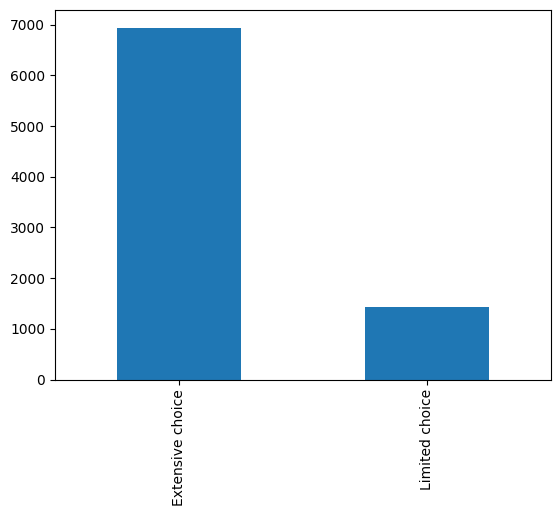

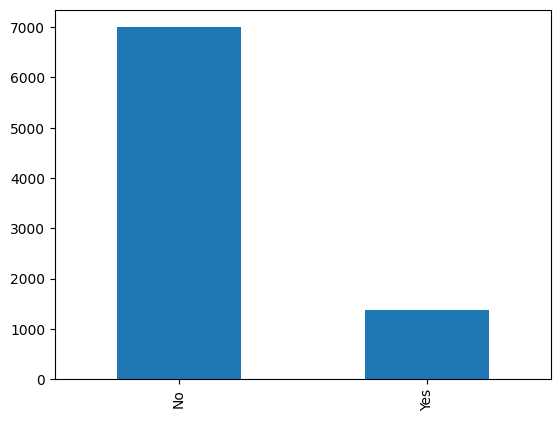

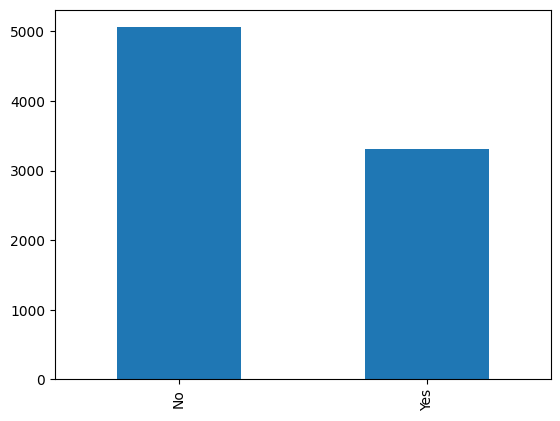

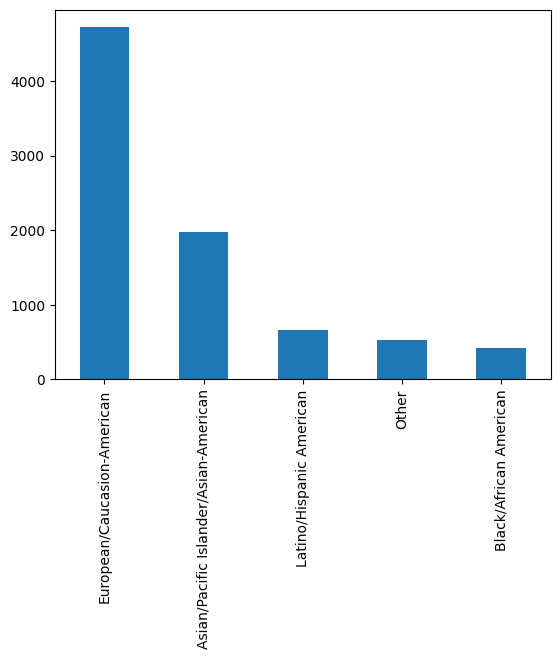

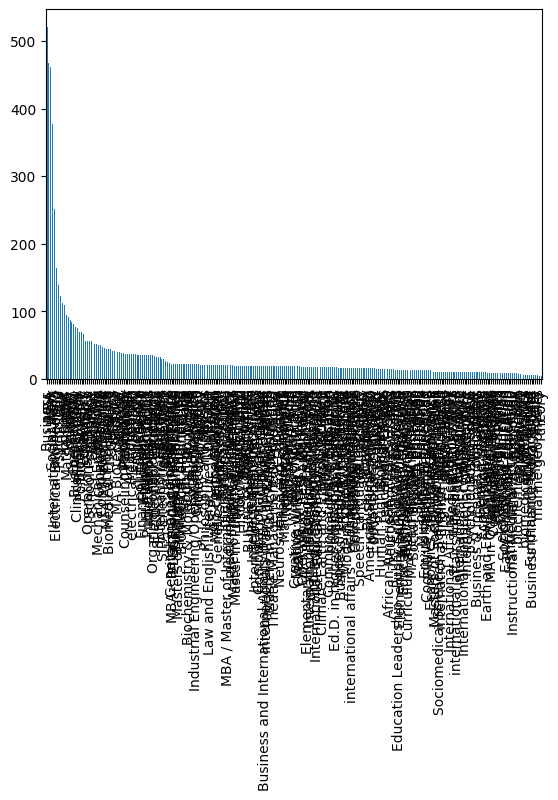

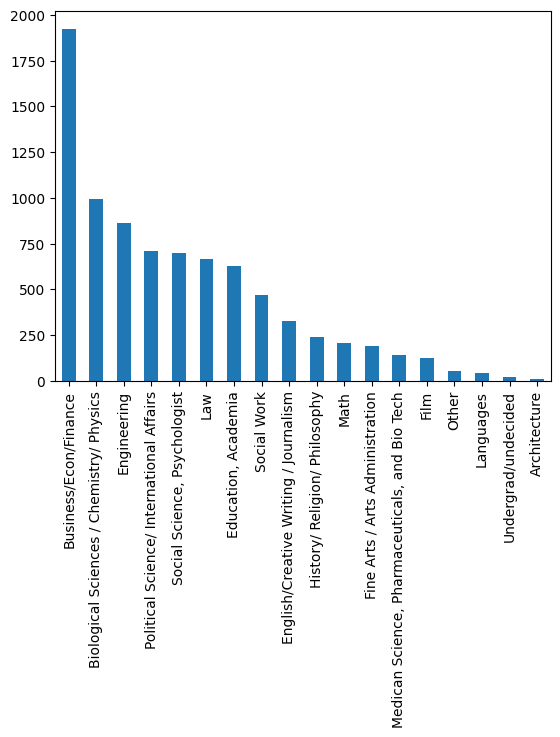

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



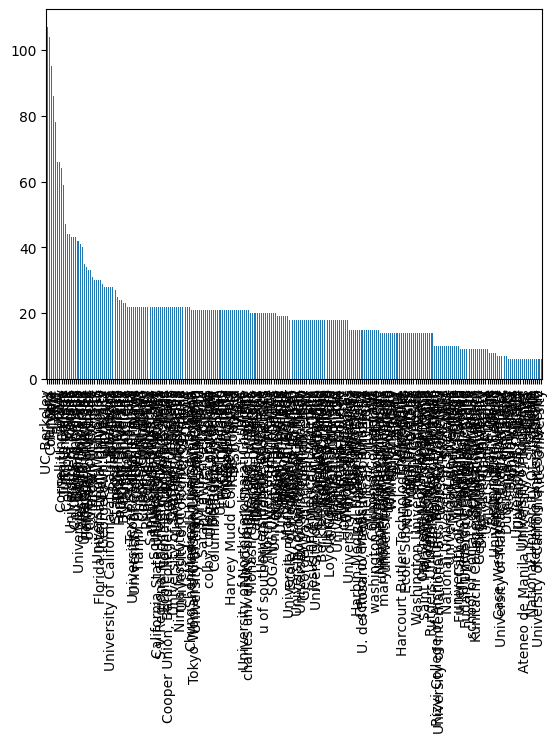

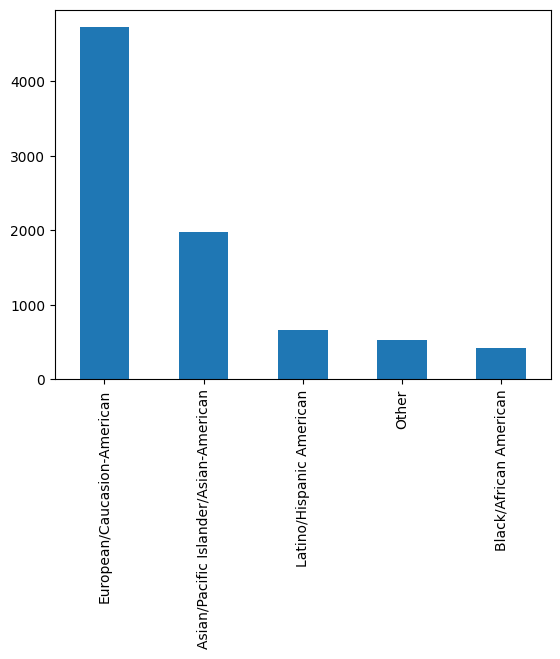

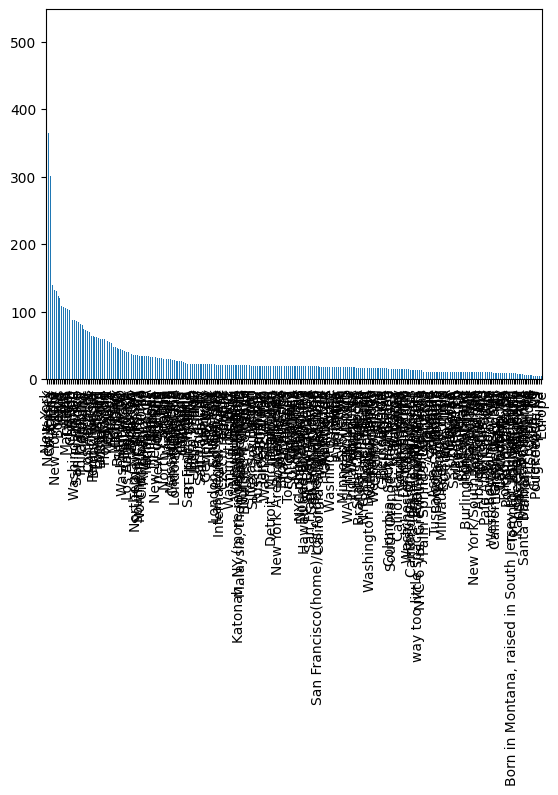

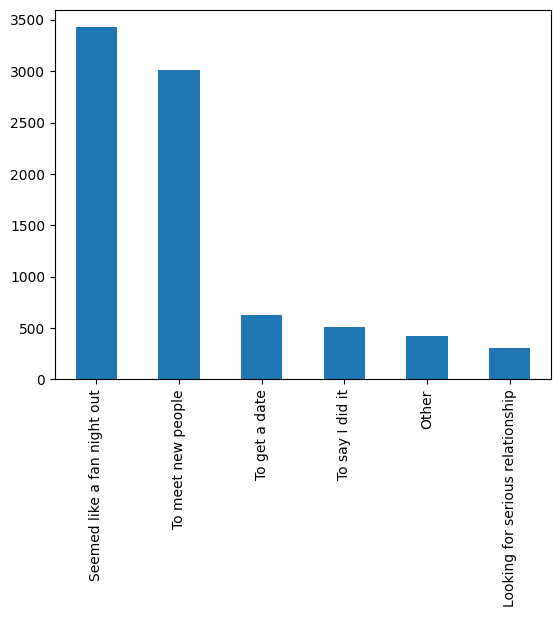

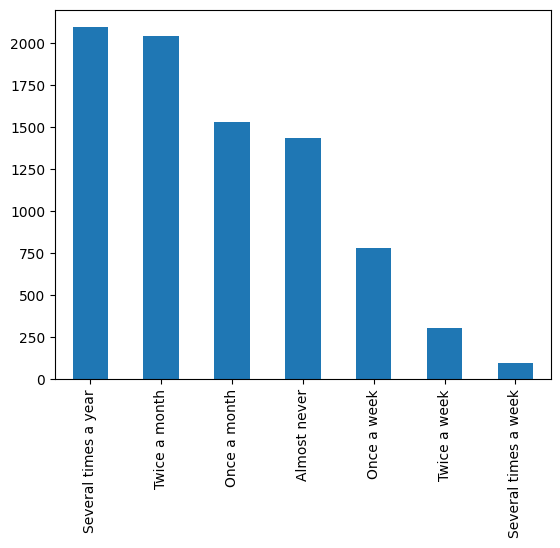

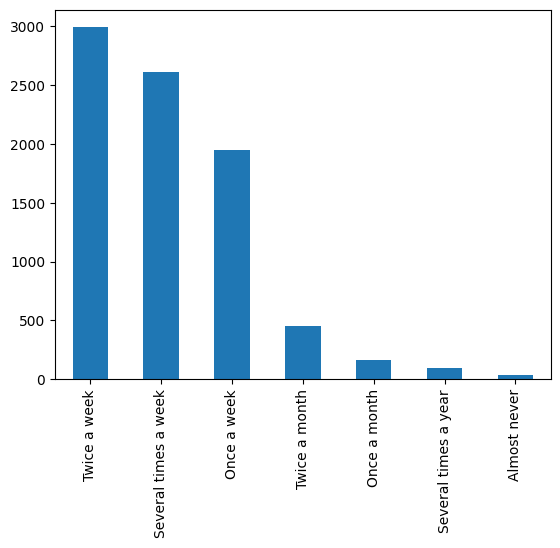

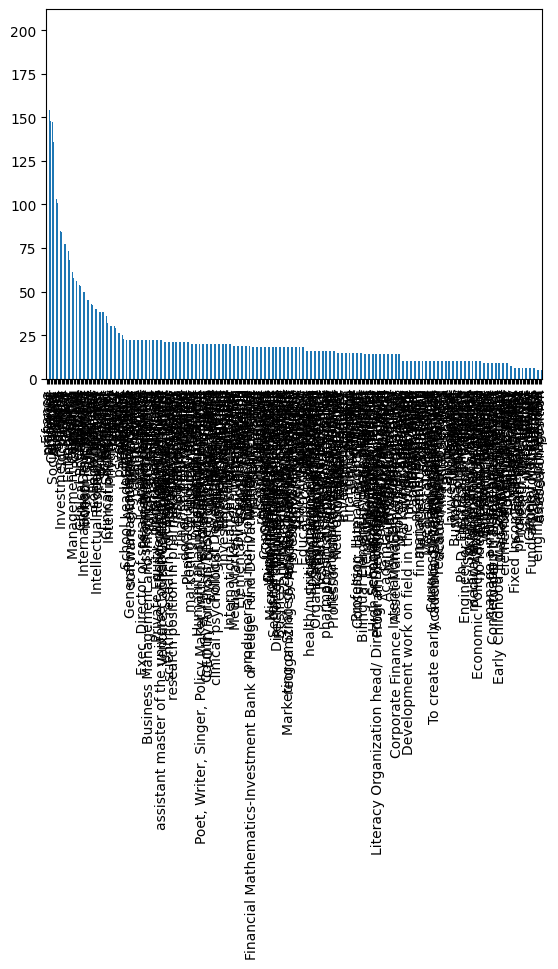

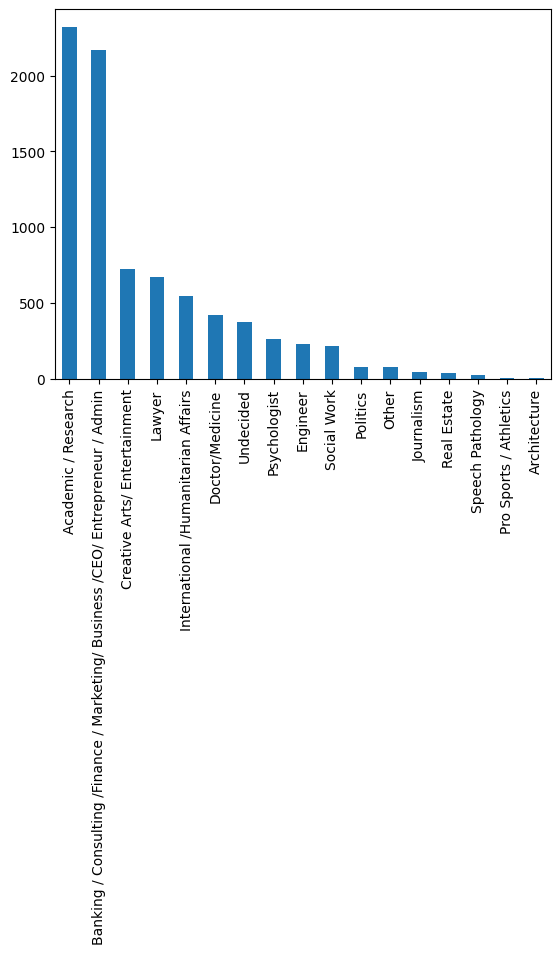

In [ ]:
for col in dataset.select_dtypes('object'):
    plt.figure()
    dataset[col].value_counts().plot.bar()

Text(0.5, 1.0, 'Distribution of Gender')

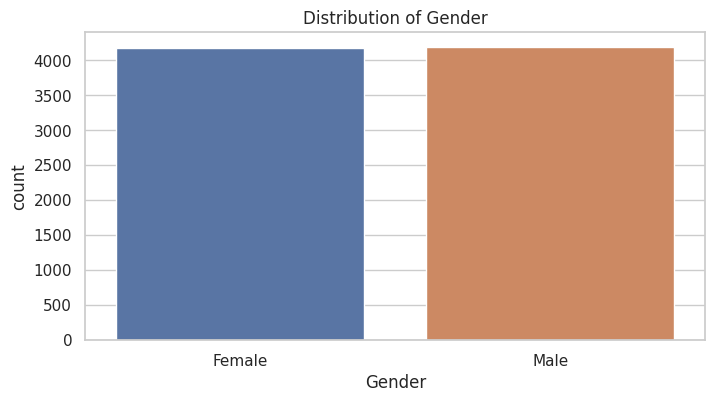

In [ ]:
plt.figure(figsize=(8,4))
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Gender', data=dataset)
plt.title('Distribution of Gender')

Text(0.5, 1.0, 'Distribution of Matches by Gender')

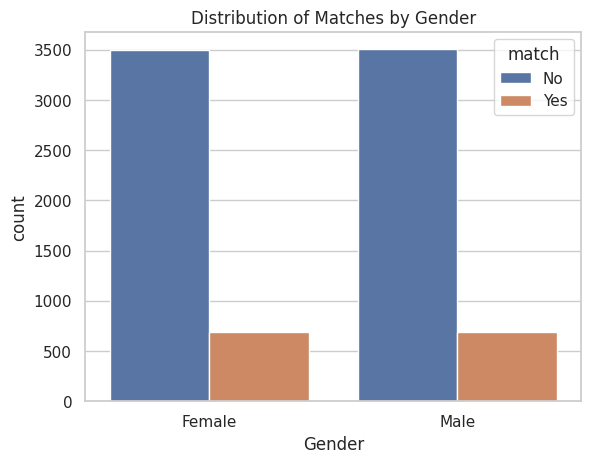

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Gender", hue= "match", data=dataset)
plt.xlabel('Gender')
plt.title('Distribution of Matches by Gender')

CE QUE LES PARTICIPANTS RECHERCHENT DANS LEURS MATCHS

In [ ]:
atributes_gender = dataset[['Gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('Gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols


In [ ]:
graph1 = go.Bar(
    y=list(atributes_gender.iloc[1]),
    x=atributes_gender.columns.values,
    name='Male',
    marker=dict(
        color='darkslateblue'
    )
)
graph2 = go.Bar(
    y=list(atributes_gender.iloc[0]),
    x=atributes_gender.columns.values,
    name='Female',
    marker=dict(
        color='orange'
    )
)

data = [graph1, graph2]
layout = go.Layout(
    title='Ce que les gens cherchent chez un partenaire opposé',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

Les statistiques et le graphique ci-dessus montrent qu'il y'a une différence entre ce que les hommes et les femmes cherchent.
Pour les participants hommes, l'attractivité de la femme a plus du poids que les autres attributs.
Pour les femmes, les points sont répartis plus uniformément sur tous les attributs, l'intelligence étant légèrement plus élevée que les autres.

En Conclusion, *Les hommes* recherchent des femmes attirantes et sont moins préoccupés par **l’ambition et les intérêts communs des femmes**. D'un autre côté, *les femmes* recherchent un homme bien équilibré et intelligent et sont moins préoccupés par **l’ambition et les intérêts communs des hommes**. *Les femmes* semblent être un peu plus exigeantes en ce qui concerne **l'intelligence**.

In [ ]:
dataset.columns

Index(['iid', 'Gender', 'Condition', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=134)

In [ ]:
# Sélectionner les colonnes d'intérêt
attr_cols = ['iid', 'Gender', 'attr', 'attr_o', 'dec', 'dec_o', 'match']

# Créer un sous-ensemble de données avec les colonnes d'intérêt
attr_data = dataset[attr_cols].dropna()

# Calculer la corrélation entre la perception de l'attractivité et l'obtention d'un deuxième rendez-vous
corr_attr = attr_data['attr'].corr(attr_data['dec'])
corr_attr_o = attr_data['attr_o'].corr(attr_data['dec_o'])

# Afficher les résultats
print("Corrélation entre la perception de l'attractivité et l'obtention d'un deuxième rendez-vous :")
print("- Attraction masculine : {:.2f}".format(corr_attr))
print("- Attraction féminine : {:.2f}".format(corr_attr_o))

# Comparer la perception de l'attractivité avec l'évaluation de l'attractivité basée sur les photos
photo_cols = ['iid', 'Gender', 'attr', 'dec', 'match', 'like', 'prob', 'met']
photo_data = dataset[photo_cols].dropna()

# Calculer la corrélation entre l'évaluation de l'attractivité basée sur les photos et l'obtention d'un deuxième rendez-vous
corr_photo = photo_data['attr'].corr(photo_data['dec'])

# Afficher les résultats
print("Corrélation entre l'évaluation de l'attractivité basée sur les photos et l'obtention d'un deuxième rendez-vous :")
print("- Attraction : {:.2f}".format(corr_photo))


Corrélation entre la perception de l'attractivité et l'obtention d'un deuxième rendez-vous :
- Attraction masculine : 0.49
- Attraction féminine : 0.49
Corrélation entre l'évaluation de l'attractivité basée sur les photos et l'obtention d'un deuxième rendez-vous :
- Attraction : 0.49


In [ ]:
plt.figure();
fig = px.histogram(dataset, x="Gender", facet_col="samerace",color="samerace",y="shar1_1");
fig.show();


<Figure size 640x480 with 0 Axes>

On constate que les intérêts communs d'une origine raciale ne sont pas partagés. De plus, les intérêts des femmes d'une même origine raciale sont plus importants que ceux des hommes d'une même origine raciale.

TESTS STATISTIQUES DE PEARSON

In [ ]:
stats, p_value = pearsonr(x=dataset["shar1_1"].dropna(axis=0), y=dataset["shar1_1"].dropna(axis=0))
stats, p_value

(0.9999999999999998, 0.0)

In [ ]:
stats, p_value = pearsonr(x=dataset["attr1_1"].dropna(axis=0), y=dataset["attr1_1"].dropna(axis=0))
stats, p_value

(1.0, 0.0)

In [ ]:
stats, p_value = pearsonr(x=dataset["sinc1_1"].dropna(axis=0), y=dataset["sinc1_1"].dropna(axis=0))
stats, p_value

(0.9999999999999987, 0.0)

In [ ]:
stats, p_value = pearsonr(x=dataset["intel1_1"].dropna(axis=0), y=dataset["intel1_1"].dropna(axis=0))
stats, p_value

(0.9999999999999968, 0.0)

In [ ]:
stats, p_value = pearsonr(x=dataset["amb1_1"].dropna(axis=0), y=dataset["amb1_1"].dropna(axis=0))
stats, p_value

(1.0, 0.0)

In [ ]:
stats, p_value = pearsonr(x=dataset["fun1_1"].dropna(axis=0), y=dataset["fun1_1"].dropna(axis=0))
stats, p_value

(0.9999999999999963, 0.0)

Les P-Value étant nul, il est difficile que les gens prédisent sur leurs propres valeurs sur le marché de rencontre.




In [ ]:
set(dataset.order)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

In [ ]:
plt.figure();
fig = px.histogram(dataset, x="order", facet_col="match",color="match");
fig.show();

<Figure size 640x480 with 0 Axes>

En termes d'obtention d'un deuxième rendez-vous, il est préférable d'être le premier speed date de la soirée parce que à la première, on trouve plus de partenaires.